# Pose Detection with OpenPose

This notebook uses an open source project [CMU-Perceptual-Computing-Lab/openpose](https://github.com/CMU-Perceptual-Computing-Lab/openpose.git) to detect/track multi person poses on a given youtube video.

For other deep-learning Colab notebooks, visit [tugstugi/dl-colab-notebooks](https://github.com/tugstugi/dl-colab-notebooks).


## Install OpenPose

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp -r /content/drive/'My Drive'/motion_reconstruction /content/
#!cp -r /content/drive/'My Drive'/SfV_data /content/
!cp -r /content/drive/'My Drive'/smpl /content/
!pip2 install deepdish
!pip install deepdish
!git clone https://github.com/polmorenoc/opendr.git
!mkdir opendr3
!cp -r /content/drive/'My Drive'/opendr /content/opendr3
!cd opendr3/opendr/opendr && python setup.py build && python setup.py install
!cd /content/motion_reconstruction/models/aj_finetuned_models_170k/pose/coco/ && ln -s pose_iter_170000.caffemodel pose_iter_440000.caffemodel
!mv motion_reconstruction/models/aj_finetuned_models_170k/pose/coco/pose_deploy.prototxt motion_reconstruction/models/aj_finetuned_models_170k/pose/coco/pose_deploy_linevec.prototxt

!pip install configobj
!apt install ffmpeg
!apt-get install blender
!apt install python2.7 python-pip
!git clone https://github.com/Dene33/hmr.git
!mv models hmr/
!pip2 install -r hmr/requirements.txt
!pip2 install opendr==0.77

import os
from os.path import exists, join, basename, splitext
git_repo_url = 'https://github.com/CMU-Perceptual-Computing-Lab/openpose.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # see: https://github.com/CMU-Perceptual-Computing-Lab/openpose/issues/949
  # install new CMake becaue of CUDA10
  !wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
  !tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local
  # clone openpose
  !git clone -q --depth 1 $git_repo_url
  !sed -i 's/execute_process(COMMAND git checkout master WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/execute_process(COMMAND git checkout f019d0dfe86f49d1140961f8c7dec22130c83154 WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/g' openpose/CMakeLists.txt
  # install system dependencies
  !apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev
  # build openpose
  !cd openpose && rm -rf build || true && mkdir build && cd build && cmake .. && make -j`nproc`
!cp -r motion_reconstruction/models/aj_finetuned_models_170k/ openpose/

  Using cached https://files.pythonhosted.org/packages/6e/39/2a47c852651982bc5eb39212ac110284dd20126bdc7b49bde401a0139f5d/deepdish-0.3.6-py2.py3-none-any.whl
Cloning into 'opendr'...
remote: Enumerating objects: 745, done.
remote: Total 745 (delta 0), reused 0 (delta 0), pack-reused 745
Receiving objects: 100% (745/745), 24.59 MiB | 16.39 MiB/s, done.
Resolving deltas: 100% (417/417), done.
running build
running build_py
copying ./renderer.py -> build/lib/opendr
running install
running bdist_egg
running egg_info
writing opendr.egg-info/PKG-INFO
writing dependency_links to opendr.egg-info/dependency_links.txt
writing requirements to opendr.egg-info/requires.txt
writing top-level names to opendr.egg-info/top_level.txt
writing manifest file 'opendr.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/opendr
creating build/bdist.linux-x86_64/egg/opendr/t

In [0]:
#!python /content/motion_reconstruction/run_openpose.py
!python /content/motion_reconstruction/refine_video.py
#!python2 motion_reconstruction/ref_2.py

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

working on barbell_0002




Instructions for updating:
Please use `layer.__call__` method instead.
Iteration 0

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Iteration 1
Reuse is on!
Iteration 2
Reuse is on!

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Setting up optimizer..

Done initializing the model!




2020-01-17 23:39:15.833897: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-01-17 23:39:15.853128: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NU

In [0]:
'''
This script is dedicated to RecVis18 student project - Topic D and Topic M.
For any questions please contact: zongmian.li@inria.fr
------
Evaluating mean per joint position error (MPJPE) on the Handtools dataset.

To do the job, please copy the following functions to your project:
- getJ3dPosFromXML
- procrustes
- compute_euclidean_dist

You can evaluate the predicted 3D pose predPos (njoints x 3) in this way:
GTPos = getJ3dPosFromXML(XMLPath, nameDict=None) # nameDict is the joint labels defined in the xml, no need to change it here
R, t, s, predPos = procrustes(predPos, GTPos) # solving Procrustes problem using SVD
mpjpe = compute_euclidean_dist(predPos, GTPos) # report the mean distance error
'''

import numpy as np
import numpy.linalg as LA
import xml.etree.ElementTree as ET
#from smpl_webuser.serialization import load_model
#from smpl_webuser.lbs import global_rigid_transformation

def procrustes(A, B):
    '''
    Solves the orthogonal Procrustes problem given a set of 3D points A (3 x N)
    and a set of target 3D points B (3 x N). Namely, it computes a group of
    R(otation), t(ranslation) and s(cale) that aligns A with B.
    '''
    # input check
    transposed = False
    if A.shape[0]!=3:
        A = A.T
        B = B.T
        transposed = True
    N = A.shape[1]
    assert(B.shape==(3,N))
    # compute mean
    a_bar = A.mean(axis=1, keepdims=True)
    b_bar = B.mean(axis=1, keepdims=True)
    # calculate rotation
    A_c = A - a_bar
    B_c = B - b_bar
    M = A_c.dot(B_c.T)
    U, Sigma, Vh = LA.svd(M)
    V = Vh.T
    Z = np.eye(U.shape[0])
    Z[-1,-1] = LA.det(V)*LA.det(U)
    R = V.dot(Z.dot(U.T))
    # compute scale
    s = np.trace(R.dot(M)) / np.trace(A_c.T.dot(A_c))
    # compute translation
    t = b_bar - s*(R.dot(a_bar))
    # compute A after alignment
    A_hat = s*(R.dot(A)) + t
    if transposed:
        A_hat = A_hat.T
    return (R, t, s, A_hat)

def compute_euclidean_dist(S1,S2,debug=False):
    #print S1.shape, S2.shape
    assert(S2.shape == S1.shape)
    assert(S1.shape[1] == 3) # S1 and S2 should be of shape njoints x 3
    distance = 0.
    for i in range(S1.shape[0]):
        distance += LA.norm(S1[i]-S2[i])
        if debug:
            print ('joint #{0}, distance {1}'.format(i,LA.norm(S1[i]-S2[i])))
    distance /= S1.shape[0]
    return distance

def getJ3dPosFromXML(XMLPath, nameDict=None):
    if nameDict is None:
        nameDict = {'R_Ankle':0,
                    'R_Knee':1,
                    'R_Hip':2,
                    'L_Hip':3,
                    'L_Knee':4,
                    'L_Ankle':5,
                    'R_Wrist':6,
                    'R_Elbow':7,
                    'R_Shoulder':8,
                    'L_Shoulder':9,
                    'L_Elbow':10,
                    'L_Wrist':11}
    annotation = ET.parse(XMLPath).getroot()
    keypoints = annotation.find('keypoints')
    GTPos = np.zeros((12,3))
    for keypoint in keypoints.findall('keypoint'):
        name = keypoint.get('name')
        x = float(keypoint.get('x'))
        y = float(keypoint.get('y'))
        # pay attention: convert to right hand coordinate frame by multiplying -1
        z = -1.*float(keypoint.get('z'))
        if name in nameDict.keys():
            GTPos[nameDict[name]] = np.array([x,y,z])
    return GTPos
import glob
import pickle, json
import pandas as pd
path_pred = 'SfV_data/out_videos'
path_truth = 'ground_truth_3d_poses'
path_other = '3d-pose-baseline/maya/3d_'
joints_index =['3', '2', '1', '4', '5', '6', '17', '16', '15', '12', '13', '14']
files = sorted(glob.glob(path_pred + '/*.pkl' ))
df = pd.DataFrame()
for file in files :
    name = file.split('/')[-1][:-4]
    infile = open(file, 'rb')
    result_dict = pickle.load(infile)
    infile.close()    
    XMLPath = path_truth + '/' +  name + '/info/'
    frames = glob.glob(XMLPath + '*') 
    mean = []
    mean_2 = []
    file_other = path_other + name + '.json'
    try :
      infile = open(file_other, 'rb')
      result_other = json.load(infile)
      infile.close() 
    except :
      pass
    for frame in frames :
      ind = int(frame.split('_0.xml')[0][-3:])
      _3d_poses = np.zeros((len(joints_index), 3))
      for indi, i in enumerate(joints_index) :
        _3d_poses[indi] = result_other[str(indi)][str(i)]['translate']      
      predPos = result_dict[ind][0]['joints3d'][0:12]
      GTPos = getJ3dPosFromXML(frame, nameDict=None)
      R, t, s, predPos = procrustes(predPos, GTPos)
      mean.append(compute_euclidean_dist(predPos, GTPos)) #+ '_frame_' + str(ind)
      R, t, s, predPos = procrustes(_3d_poses, GTPos)
      mean_2.append(compute_euclidean_dist(predPos, GTPos))
    df = df.append({'frame' :  name , 'joints error hmr' : np.mean(mean), 'joints error baseline' : np.mean(mean_2)}, ignore_index = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in double_scalars


In [0]:
!git clone https://github.com/ArashHosseini/3d-pose-baseline.git
!cd 3d-pose-baseline/ && mkdir data && cd data && wget https://www.dropbox.com/s/e35qv3n6zlkouki/h36m.zip && unzip h36m.zip && rm h36m.zip
!cp drive/'My Drive'/experiments.tar.gz /content
!tar -zxvf experiments.tar.gz && mv experiments 3d-pose-baseline/
!unzip drive/'My Drive'/SfV_data.zip -d /content/
!unzip drive/'My Drive'/handtool_videos_minimal.zip  -d /content/

In [0]:
!cd 3d-pose-baseline && python src/openpose_3dpose_sandbox.py --camera_frame --residual --batch_norm --dropout 0.5 --max_norm --evaluateActionWise --use_sh --epochs 200 --load 4874200 --pose_estimation_json /content/SfV_data/params/barbell_0003 --write_gif --gif_fps 24

In [0]:
import os
import glob

files = glob.glob('/content/SfV_data/params/*')
files = sorted([f for f in files if'pkl' not in f])[:1]
for file_ in files :
  print(file_)
  cmd = 'cd 3d-pose-baseline && python src/openpose_3dpose_sandbox.py --camera_frame --residual --batch_norm --dropout 0.5 --max_norm --evaluateActionWise --use_sh --epochs 200 --load 4874200 --pose_estimation_json ' + file_ +' --write_gif --gif_fps 24'
  res = os.system(cmd)
  if res > 0:
    print('PROBLEEEMMMM')
    pass

/content/SfV_data/params/barbell_0002


In [0]:
%%writefile /content/3d-pose-baseline/src/predict_3dpose.py
"""Predicting 3d poses from 2d joints"""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import math
import os
import random
import sys
import time
import h5py
import copy

import matplotlib.pyplot as plt
import numpy as np
from six.moves import xrange  # pylint: disable=redefined-builtin
import tensorflow as tf
import procrustes

import viz
import cameras
import data_utils
import linear_model

tf.app.flags.DEFINE_float("learning_rate", 1e-3, "Learning rate")
tf.app.flags.DEFINE_float("dropout", 1, "Dropout keep probability. 1 means no dropout")
tf.app.flags.DEFINE_integer("batch_size", 64, "Batch size to use during training")
tf.app.flags.DEFINE_integer("epochs", 200, "How many epochs we should train for")
tf.app.flags.DEFINE_boolean("camera_frame", False, "Convert 3d poses to camera coordinates")
tf.app.flags.DEFINE_boolean("max_norm", False, "Apply maxnorm constraint to the weights")
tf.app.flags.DEFINE_boolean("batch_norm", False, "Use batch_normalization")

# Data loading
tf.app.flags.DEFINE_boolean("predict_14", False, "predict 14 joints")
tf.app.flags.DEFINE_boolean("use_sh", False, "Use 2d pose predictions from StackedHourglass")
tf.app.flags.DEFINE_string("action","All", "The action to train on. 'All' means all the actions")

# Architecture
tf.app.flags.DEFINE_integer("linear_size", 1024, "Size of each model layer.")
tf.app.flags.DEFINE_integer("num_layers", 2, "Number of layers in the model.")
tf.app.flags.DEFINE_boolean("residual", False, "Whether to add a residual connection every 2 layers")

# Evaluation
tf.app.flags.DEFINE_boolean("procrustes", False, "Apply procrustes analysis at test time")
tf.app.flags.DEFINE_boolean("evaluateActionWise",False, "The dataset to use either h36m or heva")

# Directories
tf.app.flags.DEFINE_string("cameras_path","data/h36m/cameras.h5","Directory to load camera parameters")
tf.app.flags.DEFINE_string("data_dir",   "data/h36m/", "Data directory")
tf.app.flags.DEFINE_string("train_dir", "experiments", "Training directory.")

# openpose
tf.app.flags.DEFINE_string("pose_estimation_json", "/tmp/", "pose estimation json output directory, openpose or tf-pose-estimation")
tf.app.flags.DEFINE_boolean("interpolation", False, "interpolate openpose json")
tf.app.flags.DEFINE_float("multiplier", 0.1, "interpolation frame range")
tf.app.flags.DEFINE_boolean("write_gif", False, "write final anim gif")
tf.app.flags.DEFINE_integer("gif_fps", 30, "output gif framerate")
tf.app.flags.DEFINE_integer("verbose", 2, "0:Error, 1:Warning, 2:INFO*(default), 3:debug")
tf.app.flags.DEFINE_boolean("cache_on_fail", True, "caching last valid frame on invalid frame")

# Train or load
tf.app.flags.DEFINE_boolean("sample", False, "Set to True for sampling.")
tf.app.flags.DEFINE_boolean("use_cpu", False, "Whether to use the CPU")
tf.app.flags.DEFINE_integer("load", 0, "Try to load a previous checkpoint.")

# Misc
tf.app.flags.DEFINE_boolean("use_fp16", False, "Train using fp16 instead of fp32.")

FLAGS = tf.app.flags.FLAGS

train_dir = os.path.join( FLAGS.train_dir,
  FLAGS.action,
  'dropout_{0}'.format(FLAGS.dropout),
  'epochs_{0}'.format(FLAGS.epochs) if FLAGS.epochs > 0 else '',
  'lr_{0}'.format(FLAGS.learning_rate),
  'residual' if FLAGS.residual else 'not_residual',
  'depth_{0}'.format(FLAGS.num_layers),
  'linear_size{0}'.format(FLAGS.linear_size),
  'batch_size_{0}'.format(FLAGS.batch_size),
  'procrustes' if FLAGS.procrustes else 'no_procrustes',
  'maxnorm' if FLAGS.max_norm else 'no_maxnorm',
  'batch_normalization' if FLAGS.batch_norm else 'no_batch_normalization',
  'use_stacked_hourglass' if FLAGS.use_sh else 'not_stacked_hourglass',
  'predict_14' if FLAGS.predict_14 else 'predict_17')

print( train_dir )
summaries_dir = os.path.join( train_dir, "log" ) # Directory for TB summaries

# To avoid race conditions: https://github.com/tensorflow/tensorflow/issues/7448
os.system('mkdir -p {}'.format(summaries_dir))

def create_model( session, actions, batch_size ):
  """
  Create model and initialize it or load its parameters in a session

  Args
    session: tensorflow session
    actions: list of string. Actions to train/test on
    batch_size: integer. Number of examples in each batch
  Returns
    model: The created (or loaded) model
  Raises
    ValueError if asked to load a model, but the checkpoint specified by
    FLAGS.load cannot be found.
  """

  model = linear_model.LinearModel(
      FLAGS.linear_size,
      FLAGS.num_layers,
      FLAGS.residual,
      FLAGS.batch_norm,
      FLAGS.max_norm,
      batch_size,
      FLAGS.learning_rate,
      summaries_dir,
      FLAGS.predict_14,
      dtype=tf.float16 if FLAGS.use_fp16 else tf.float32)

  if FLAGS.load <= 0:
    # Create a new model from scratch
    print("Creating model with fresh parameters.")
    session.run( tf.global_variables_initializer() )
    return model

  # Load a previously saved model
  ckpt = tf.train.get_checkpoint_state( train_dir, latest_filename="checkpoint")
  print( "train_dir", train_dir )
  #import pdb; pdb.set_trace()
  if ckpt and ckpt.model_checkpoint_path:
    # Check if the specific checkpoint exists
    if FLAGS.load > 0:
      if os.path.isfile(os.path.join(train_dir,"checkpoint-{0}.index".format(FLAGS.load))):
        ckpt_name = os.path.join( os.path.join(train_dir,"checkpoint-{0}".format(FLAGS.load)) )
      else:
        raise ValueError("Asked to load checkpoint {0}, but it does not seem to exist".format(FLAGS.load))
    else:
      ckpt_name = os.path.basename( ckpt.model_checkpoint_path )

    print("Loading model {0}".format( ckpt_name ))
    model.saver.restore( session, ckpt.model_checkpoint_path )
    return model
  else:
    print("Could not find checkpoint. Aborting.")
    raise( ValueError, "Checkpoint {0} does not seem to exist".format( ckpt.model_checkpoint_path ) )

  return model

def train():
  """Train a linear model for 3d pose estimation"""

  actions = data_utils.define_actions( FLAGS.action )

  number_of_actions = len( actions )

  # Load camera parameters
  SUBJECT_IDS = [1,5,6,7,8,9,11]
  rcams = cameras.load_cameras(FLAGS.cameras_path, SUBJECT_IDS)

  # Load 3d data and load (or create) 2d projections
  train_set_3d, test_set_3d, data_mean_3d, data_std_3d, dim_to_ignore_3d, dim_to_use_3d, train_root_positions, test_root_positions = data_utils.read_3d_data(
    actions, FLAGS.data_dir, FLAGS.camera_frame, rcams, FLAGS.predict_14 )

  # Read stacked hourglass 2D predictions if use_sh, otherwise use groundtruth 2D projections
  if FLAGS.use_sh:
    train_set_2d, test_set_2d, data_mean_2d, data_std_2d, dim_to_ignore_2d, dim_to_use_2d = data_utils.read_2d_predictions(actions, FLAGS.data_dir)
  else:
    train_set_2d, test_set_2d, data_mean_2d, data_std_2d, dim_to_ignore_2d, dim_to_use_2d = data_utils.create_2d_data( actions, FLAGS.data_dir, rcams )
  print( "done reading and normalizing data." )

  # Avoid using the GPU if requested
  device_count = {"GPU": 0} if FLAGS.use_cpu else {"GPU": 1}
  with tf.Session(config=tf.ConfigProto(
    device_count=device_count,
    allow_soft_placement=True )) as sess:

    # === Create the model ===
    print("Creating %d bi-layers of %d units." % (FLAGS.num_layers, FLAGS.linear_size))
    model = create_model( sess, actions, FLAGS.batch_size )
    model.train_writer.add_graph( sess.graph )
    print("Model created")

    #=== This is the training loop ===
    step_time, loss, val_loss = 0.0, 0.0, 0.0
    current_step = 0 if FLAGS.load <= 0 else FLAGS.load + 1
    previous_losses = []

    step_time, loss = 0, 0
    current_epoch = 0
    log_every_n_batches = 100

    for _ in xrange( FLAGS.epochs ):
      current_epoch = current_epoch + 1

      # === Load training batches for one epoch ===
      encoder_inputs, decoder_outputs = model.get_all_batches( train_set_2d, train_set_3d, FLAGS.camera_frame, training=True )
      nbatches = len( encoder_inputs )
      print("There are {0} train batches".format( nbatches ))
      start_time, loss = time.time(), 0.

      # === Loop through all the training batches ===
      for i in range( nbatches ):

        if (i+1) % log_every_n_batches == 0:
          # Print progress every log_every_n_batches batches
          print("Working on epoch {0}, batch {1} / {2}... ".format( current_epoch, i+1, nbatches), end="" )

        enc_in, dec_out = encoder_inputs[i], decoder_outputs[i]
        step_loss, loss_summary, lr_summary, _ =  model.step( sess, enc_in, dec_out, FLAGS.dropout, isTraining=True )

        if (i+1) % log_every_n_batches == 0:
          # Log and print progress every log_every_n_batches batches
          model.train_writer.add_summary( loss_summary, current_step )
          model.train_writer.add_summary( lr_summary, current_step )
          step_time = (time.time() - start_time)
          start_time = time.time()
          print("done in {0:.2f} ms".format( 1000*step_time / log_every_n_batches ) )

        loss += step_loss
        current_step += 1
        # === end looping through training batches ===

      loss = loss / nbatches
      print("=============================\n"
            "Global step:         %d\n"
            "Learning rate:       %.2e\n"
            "Train loss avg:      %.4f\n"
            "=============================" % (model.global_step.eval(),
            model.learning_rate.eval(), loss) )
      # === End training for an epoch ===

      # === Testing after this epoch ===
      isTraining = False

      if FLAGS.evaluateActionWise:

        print("{0:=^12} {1:=^6}".format("Action", "mm")) # line of 30 equal signs

        cum_err = 0
        for action in actions:

          print("{0:<12} ".format(action), end="")
          # Get 2d and 3d testing data for this action
          action_test_set_2d = get_action_subset( test_set_2d, action )
          action_test_set_3d = get_action_subset( test_set_3d, action )
          encoder_inputs, decoder_outputs = model.get_all_batches( action_test_set_2d, action_test_set_3d, FLAGS.camera_frame, training=False)

          act_err, _, step_time, loss = evaluate_batches( sess, model,
            data_mean_3d, data_std_3d, dim_to_use_3d, dim_to_ignore_3d,
            data_mean_2d, data_std_2d, dim_to_use_2d, dim_to_ignore_2d,
            current_step, encoder_inputs, decoder_outputs )
          cum_err = cum_err + act_err

          print("{0:>6.2f}".format(act_err))

        summaries = sess.run( model.err_mm_summary, {model.err_mm: float(cum_err/float(len(actions)))} )
        model.test_writer.add_summary( summaries, current_step )
        print("{0:<12} {1:>6.2f}".format("Average", cum_err/float(len(actions) )))
        print("{0:=^19}".format(''))

      else:

        n_joints = 17 if not(FLAGS.predict_14) else 14
        encoder_inputs, decoder_outputs = model.get_all_batches( test_set_2d, test_set_3d, FLAGS.camera_frame, training=False)

        total_err, joint_err, step_time, loss = evaluate_batches( sess, model,
          data_mean_3d, data_std_3d, dim_to_use_3d, dim_to_ignore_3d,
          data_mean_2d, data_std_2d, dim_to_use_2d, dim_to_ignore_2d,
          current_step, encoder_inputs, decoder_outputs, current_epoch )

        print("=============================\n"
              "Step-time (ms):      %.4f\n"
              "Val loss avg:        %.4f\n"
              "Val error avg (mm):  %.2f\n"
              "=============================" % ( 1000*step_time, loss, total_err ))

        for i in range(n_joints):
          # 6 spaces, right-aligned, 5 decimal places
          print("Error in joint {0:02d} (mm): {1:>5.2f}".format(i+1, joint_err[i]))
        print("=============================")

        # Log the error to tensorboard
        summaries = sess.run( model.err_mm_summary, {model.err_mm: total_err} )
        model.test_writer.add_summary( summaries, current_step )

      # Save the model
      print( "Saving the model... ", end="" )
      start_time = time.time()
      model.saver.save(sess, os.path.join(train_dir, 'checkpoint'), global_step=current_step )
      print( "done in {0:.2f} ms".format(1000*(time.time() - start_time)) )

      # Reset global time and loss
      step_time, loss = 0, 0

      sys.stdout.flush()


def get_action_subset( poses_set, action ):
  """
  Given a preloaded dictionary of poses, load the subset of a particular action

  Args
    poses_set: dictionary with keys k=(subject, action, seqname),
      values v=(nxd matrix of poses)
    action: string. The action that we want to filter out
  Returns
    poses_subset: dictionary with same structure as poses_set, but only with the
      specified action.
  """
  return {k:v for k, v in poses_set.items() if k[1] == action}


def evaluate_batches( sess, model,
  data_mean_3d, data_std_3d, dim_to_use_3d, dim_to_ignore_3d,
  data_mean_2d, data_std_2d, dim_to_use_2d, dim_to_ignore_2d,
  current_step, encoder_inputs, decoder_outputs, current_epoch=0 ):
  """
  Generic method that evaluates performance of a list of batches.
  May be used to evaluate all actions or a single action.

  Args
    sess
    model
    data_mean_3d
    data_std_3d
    dim_to_use_3d
    dim_to_ignore_3d
    data_mean_2d
    data_std_2d
    dim_to_use_2d
    dim_to_ignore_2d
    current_step
    encoder_inputs
    decoder_outputs
    current_epoch
  Returns

    total_err
    joint_err
    step_time
    loss
  """

  n_joints = 17 if not(FLAGS.predict_14) else 14
  nbatches = len( encoder_inputs )

  # Loop through test examples
  all_dists, start_time, loss = [], time.time(), 0.
  log_every_n_batches = 100
  for i in range(nbatches):

    if current_epoch > 0 and (i+1) % log_every_n_batches == 0:
      print("Working on test epoch {0}, batch {1} / {2}".format( current_epoch, i+1, nbatches) )

    enc_in, dec_out = encoder_inputs[i], decoder_outputs[i]
    dp = 1.0 # dropout keep probability is always 1 at test time
    step_loss, loss_summary, poses3d = model.step( sess, enc_in, dec_out, dp, isTraining=False )
    loss += step_loss

    # denormalize
    enc_in  = data_utils.unNormalizeData( enc_in,  data_mean_2d, data_std_2d, dim_to_ignore_2d )
    dec_out = data_utils.unNormalizeData( dec_out, data_mean_3d, data_std_3d, dim_to_ignore_3d )
    poses3d = data_utils.unNormalizeData( poses3d, data_mean_3d, data_std_3d, dim_to_ignore_3d )

    # Keep only the relevant dimensions
    dtu3d = np.hstack( (np.arange(3), dim_to_use_3d) ) if not(FLAGS.predict_14) else  dim_to_use_3d

    dec_out = dec_out[:, dtu3d]
    poses3d = poses3d[:, dtu3d]

    assert dec_out.shape[0] == FLAGS.batch_size
    assert poses3d.shape[0] == FLAGS.batch_size

    if FLAGS.procrustes:
      # Apply per-frame procrustes alignment if asked to do so
      for j in range(FLAGS.batch_size):
        gt  = np.reshape(dec_out[j,:],[-1,3])
        out = np.reshape(poses3d[j,:],[-1,3])
        _, Z, T, b, c = procrustes.compute_similarity_transform(gt,out,compute_optimal_scale=True)
        out = (b*out.dot(T))+c

        poses3d[j,:] = np.reshape(out,[-1,17*3] ) if not(FLAGS.predict_14) else np.reshape(out,[-1,14*3] )

    # Compute Euclidean distance error per joint
    sqerr = (poses3d - dec_out)**2 # Squared error between prediction and expected output
    dists = np.zeros( (sqerr.shape[0], n_joints) ) # Array with L2 error per joint in mm
    dist_idx = 0
    for k in np.arange(0, n_joints*3, 3):
      # Sum across X,Y, and Z dimenstions to obtain L2 distance
      dists[:,dist_idx] = np.sqrt( np.sum( sqerr[:, k:k+3], axis=1 ))
      dist_idx = dist_idx + 1

    all_dists.append(dists)
    assert sqerr.shape[0] == FLAGS.batch_size

  step_time = (time.time() - start_time) / nbatches
  loss      = loss / nbatches

  all_dists = np.vstack( all_dists )

  # Error per joint and total for all passed batches
  joint_err = np.mean( all_dists, axis=0 )
  total_err = np.mean( all_dists )

  return total_err, joint_err, step_time, loss


def sample():
  """Get samples from a model and visualize them"""

  actions = data_utils.define_actions( FLAGS.action )

  # Load camera parameters
  SUBJECT_IDS = [1,5,6,7,8,9,11]
  rcams = cameras.load_cameras(FLAGS.cameras_path, SUBJECT_IDS)

  # Load 3d data and load (or create) 2d projections
  train_set_3d, test_set_3d, data_mean_3d, data_std_3d, dim_to_ignore_3d, dim_to_use_3d, train_root_positions, test_root_positions = data_utils.read_3d_data(
    actions, FLAGS.data_dir, FLAGS.camera_frame, rcams, FLAGS.predict_14 )

  if FLAGS.use_sh:
    train_set_2d, test_set_2d, data_mean_2d, data_std_2d, dim_to_ignore_2d, dim_to_use_2d = data_utils.read_2d_predictions(actions, FLAGS.data_dir)
  else:
    train_set_2d, test_set_2d, data_mean_2d, data_std_2d, dim_to_ignore_2d, dim_to_use_2d = data_utils.create_2d_data( actions, FLAGS.data_dir, rcams )
  print( "done reading and normalizing data." )

  device_count = {"GPU": 0} if FLAGS.use_cpu else {"GPU": 1}
  with tf.Session(config=tf.ConfigProto( device_count = device_count )) as sess:
    # === Create the model ===
    print("Creating %d layers of %d units." % (FLAGS.num_layers, FLAGS.linear_size))
    batch_size = 128
    model = create_model(sess, actions, batch_size)
    print("Model loaded")

    for key2d in test_set_2d.keys():

      (subj, b, fname) = key2d
      print( "Subject: {}, action: {}, fname: {}".format(subj, b, fname) )

      # keys should be the same if 3d is in camera coordinates
      key3d = key2d if FLAGS.camera_frame else (subj, b, '{0}.h5'.format(fname.split('.')[0]))
      key3d = (subj, b, fname[:-3]) if (fname.endswith('-sh')) and FLAGS.camera_frame else key3d

      enc_in  = test_set_2d[ key2d ]
      n2d, _ = enc_in.shape
      dec_out = test_set_3d[ key3d ]
      n3d, _ = dec_out.shape
      assert n2d == n3d

      # Split into about-same-size batches
      enc_in   = np.array_split( enc_in,  n2d // batch_size )
      dec_out  = np.array_split( dec_out, n3d // batch_size )
      all_poses_3d = []

      for bidx in range( len(enc_in) ):

        # Dropout probability 0 (keep probability 1) for sampling
        dp = 1.0
        _, _, poses3d = model.step(sess, enc_in[bidx], dec_out[bidx], dp, isTraining=False)

        # denormalize
        enc_in[bidx]  = data_utils.unNormalizeData(  enc_in[bidx], data_mean_2d, data_std_2d, dim_to_ignore_2d )
        dec_out[bidx] = data_utils.unNormalizeData( dec_out[bidx], data_mean_3d, data_std_3d, dim_to_ignore_3d )
        poses3d = data_utils.unNormalizeData( poses3d, data_mean_3d, data_std_3d, dim_to_ignore_3d )
        all_poses_3d.append( poses3d )

      # Put all the poses together
      enc_in, dec_out, poses3d = map( np.vstack, [enc_in, dec_out, all_poses_3d] )

      # Convert back to world coordinates
      if FLAGS.camera_frame:
        N_CAMERAS = 4
        N_JOINTS_H36M = 32

        # Add global position back
        dec_out = dec_out + np.tile( test_root_positions[ key3d ], [1,N_JOINTS_H36M] )

        # Load the appropriate camera
        subj, _, sname = key3d

        cname = sname.split('.')[1] # <-- camera name
        scams = {(subj,c+1): rcams[(subj,c+1)] for c in range(N_CAMERAS)} # cams of this subject
        scam_idx = [scams[(subj,c+1)][-1] for c in range(N_CAMERAS)].index( cname ) # index of camera used
        the_cam  = scams[(subj, scam_idx+1)] # <-- the camera used
        R, T, f, c, k, p, name = the_cam
        assert name == cname

        def cam2world_centered(data_3d_camframe):
          data_3d_worldframe = cameras.camera_to_world_frame(data_3d_camframe.reshape((-1, 3)), R, T)
          data_3d_worldframe = data_3d_worldframe.reshape((-1, N_JOINTS_H36M*3))
          # subtract root translation
          return data_3d_worldframe - np.tile( data_3d_worldframe[:,:3], (1,N_JOINTS_H36M) )

        # Apply inverse rotation and translation
        dec_out = cam2world_centered(dec_out)
        poses3d = cam2world_centered(poses3d)

  # Grab a random batch to visualize
  enc_in, dec_out, poses3d = map( np.vstack, [enc_in, dec_out, poses3d] )
  idx = np.random.permutation( enc_in.shape[0] )
  enc_in, dec_out, poses3d = enc_in[idx, :], dec_out[idx, :], poses3d[idx, :]

  # Visualize random samples
  import matplotlib.gridspec as gridspec

  # 1080p	= 1,920 x 1,080
  fig = plt.figure( figsize=(19.2, 10.8) )

  gs1 = gridspec.GridSpec(5, 9) # 5 rows, 9 columns
  gs1.update(wspace=-0.00, hspace=0.05) # set the spacing between axes.
  plt.axis('off')

  subplot_idx, exidx = 1, 1
  nsamples = 15
  for i in np.arange( nsamples ):

    # Plot 2d pose
    ax1 = plt.subplot(gs1[subplot_idx-1])
    p2d = enc_in[exidx,:]
    #viz.show2Dpose( p2d, ax1 )
    ax1.invert_yaxis()

    # Plot 3d gt
    ax2 = plt.subplot(gs1[subplot_idx], projection='3d')
    p3d = dec_out[exidx,:]
    #viz.show3Dpose( p3d, ax2 )

    # Plot 3d predictions
    ax3 = plt.subplot(gs1[subplot_idx+1], projection='3d')
    p3d = poses3d[exidx,:]
    #viz.show3Dpose( p3d, ax3, lcolor="#9b59b6", rcolor="#2ecc71" )

    exidx = exidx + 1
    subplot_idx = subplot_idx + 3

  plt.show()

def main(_):
  if FLAGS.sample:
    sample()
  else:
    train()

if __name__ == "__main__":
  tf.app.run()


Overwriting /content/3d-pose-baseline/src/predict_3dpose.py


In [0]:
%%writefile /content/3d-pose-baseline/src/openpose_3dpose_sandbox.py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import tensorflow as tf
import data_utils
import viz
import re
import cameras
import json
import os
import time
from predict_3dpose import create_model
import cv2
import imageio
import logging
import scipy as sp
from pprint import pprint
from scipy.interpolate import interp1d
from scipy.interpolate import UnivariateSpline

FLAGS = tf.app.flags.FLAGS

order = [15, 12, 25, 26, 27, 17, 18, 19, 1, 2, 3, 6, 7, 8]

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

def show_anim_curves(anim_dict, _plt):
    val = np.array(list(anim_dict.values()))
    for o in range(0,36,2):
        x = val[:,o]
        y = val[:,o+1]
        _plt.plot(x, 'r--', linewidth=0.2)
        _plt.plot(y, 'g', linewidth=0.2)
    return _plt

def read_openpose_json(smooth=True, *args):
    # openpose output format:
    # [x1,y1,c1,x2,y2,c2,...]
    # ignore confidence score, take x and y [x1,y1,x2,y2,...]

    logger.info("start reading json files")
    #load json files
    json_files = os.listdir(openpose_output_dir)
    # check for other file types
    json_files = sorted([filename for filename in json_files if filename.endswith(".json")])
    cache = {}
    smoothed = {}
    ### extract x,y and ignore confidence score
    for file_name in json_files:
        logger.debug("reading {0}".format(file_name))
        _file = os.path.join(openpose_output_dir, file_name)
        if not os.path.isfile(_file): raise Exception("No file found!!, {0}".format(_file))
        data = json.load(open(_file))
        #take first person
        _data = data["people"][0]["pose_keypoints_2d"] if "pose_keypoints_2d" in data["people"][0] else data["people"][0]["pose_keypoints"]
        xy = []
        if len(_data)>=53:
            #openpose incl. confidence score
            #ignore confidence score
            for o in range(0,len(_data),3):
                xy.append(_data[o])
                xy.append(_data[o+1])
        else:
            #tf-pose-estimation
            xy = _data

        # get frame index from openpose 12 padding
        frame_indx = re.findall("(\d+)", file_name)
        logger.debug("found {0} for frame {1}".format(xy, str(int(frame_indx[-1]))))

        #body_25 support, convert body_25 output format to coco
        if len(_data)>54:
            _xy = xy[0:19*2]
            for x in range(len(xy)):
                #del jnt 8
                if x==8*2:
                    del _xy[x]
                if x==8*2+1:
                    del _xy[x]
                #map jnt 9 to 8
                if x==9*2:
                    _xy[16] = xy[x]
                    _xy[17] = xy[x+1]
                #map jnt 10 to 9
                if x==10*2:
                    _xy[18] = xy[x]
                    _xy[19] = xy[x+1]         
                #map jnt 11 to 10
                if x==11*2:
                    _xy[20] = xy[x]
                    _xy[21] = xy[x+1]
                #map jnt 12 to 11
                if x==12*2:
                    _xy[22] = xy[x]
                    _xy[23] = xy[x+1]
                #map jnt 13 to 12
                if x==13*2:
                    _xy[24] = xy[x]
                    _xy[25] = xy[x+1]         
                #map jnt 14 to 13
                if x==14*2:
                    _xy[26] = xy[x]
                    _xy[27] = xy[x+1]
                #map jnt 15 to 14
                if x==15*2:
                    _xy[28] = xy[x]
                    _xy[29] = xy[x+1]
                #map jnt 16 to 15
                if x==16*2:
                    _xy[30] = xy[x]
                    _xy[31] = xy[x+1]
                #map jnt 17 to 16
                if x==17*2:
                    _xy[32] = xy[x]
                    _xy[33] = xy[x+1]
                #map jnt 18 to 17
                if x==18*2:
                    _xy[34] = xy[x]
                    _xy[35] = xy[x+1]
            #coco 
            xy = _xy

        #add xy to frame
        cache[int(frame_indx[-1])] = xy

    #plt.figure(1)
    #drop_curves_plot = show_anim_curves(cache, plt)
    #pngName = 'gif_output/dirty_plot.png'
    #drop_curves_plot.savefig(pngName)
    #logger.info('writing gif_output/dirty_plot.png')

    # exit if no smoothing
    if not smooth:
        # return frames cache incl. 18 joints (x,y)
        return cache

    if len(json_files) == 1:
        logger.info("found single json file")
        # return frames cache incl. 18 joints (x,y) on single image\json
        return cache

    if len(json_files) <= 8:
        raise Exception("need more frames, min 9 frames/json files for smoothing!!!")

    logger.info("start smoothing")

    # create frame blocks
    head_frame_block = [int(re.findall("(\d+)", o)[-1]) for o in json_files[:4]]
    tail_frame_block = [int(re.findall("(\d+)", o)[-1]) for o in json_files[-4:]]

    ### smooth by median value, n frames 
    for frame, xy in cache.items():
        # create neighbor array based on frame index
        forward, back = ([] for _ in range(2))

        # joints x,y array
        _len = len(xy) # 36

        # create array of parallel frames (-3<n>3)
        for neighbor in range(1,4):
            # first n frames, get value of xy in postive lookahead frames(current frame + 3)
            if frame in head_frame_block:
                forward += cache[frame+neighbor]
            # last n frames, get value of xy in negative lookahead frames(current frame - 3)
            elif frame in tail_frame_block:
                back += cache[frame-neighbor]
            else:
                # between frames, get value of xy in bi-directional frames(current frame -+ 3)     
                forward += cache[frame+neighbor]
                back += cache[frame-neighbor]

        # build frame range vector 
        frames_joint_median = [0 for i in range(_len)]
        # more info about mapping in src/data_utils.py
        # for each 18joints*x,y  (x1,y1,x2,y2,...)~36 
        for x in range(0,_len,2):
            # set x and y
            y = x+1
            if frame in head_frame_block:
                # get vector of n frames forward for x and y, incl. current frame
                x_v = [xy[x], forward[x], forward[x+_len], forward[x+_len*2]]
                y_v = [xy[y], forward[y], forward[y+_len], forward[y+_len*2]]
            elif frame in tail_frame_block:
                # get vector of n frames back for x and y, incl. current frame
                x_v =[xy[x], back[x], back[x+_len], back[x+_len*2]]
                y_v =[xy[y], back[y], back[y+_len], back[y+_len*2]]
            else:
                # get vector of n frames forward/back for x and y, incl. current frame
                # median value calc: find neighbor frames joint value and sorted them, use numpy median module
                # frame[x1,y1,[x2,y2],..]frame[x1,y1,[x2,y2],...], frame[x1,y1,[x2,y2],..]
                #                 ^---------------------|-------------------------^
                x_v =[xy[x], forward[x], forward[x+_len], forward[x+_len*2],
                        back[x], back[x+_len], back[x+_len*2]]
                y_v =[xy[y], forward[y], forward[y+_len], forward[y+_len*2],
                        back[y], back[y+_len], back[y+_len*2]]

            # get median of vector
            x_med = np.median(sorted(x_v))
            y_med = np.median(sorted(y_v))

            # holding frame drops for joint
            if not x_med:
                # allow fix from first frame
                if frame:
                    # get x from last frame
                    x_med = smoothed[frame-1][x]
            # if joint is hidden y
            if not y_med:
                # allow fix from first frame
                if frame:
                    # get y from last frame
                    y_med = smoothed[frame-1][y]

            logger.debug("old X {0} sorted neighbor {1} new X {2}".format(xy[x],sorted(x_v), x_med))
            logger.debug("old Y {0} sorted neighbor {1} new Y {2}".format(xy[y],sorted(y_v), y_med))

            # build new array of joint x and y value
            frames_joint_median[x] = x_med 
            frames_joint_median[x+1] = y_med 
		

        smoothed[frame] = frames_joint_median

    return smoothed


def main(_):
    
    smoothed = read_openpose_json()
    #plt.figure(2)
    #smooth_curves_plot = show_anim_curves(smoothed, plt)
    #return
    #pngName = 'gif_output/smooth_plot.png'
    #smooth_curves_plot.savefig(pngName)
    #logger.info('writing gif_output/smooth_plot.png')
    
    if FLAGS.interpolation:
        logger.info("start interpolation")

        framerange = len( smoothed.keys() )
        joint_rows = 36
        array = np.concatenate(list(smoothed.values()))
        array_reshaped = np.reshape(array, (framerange, joint_rows) )
    
        multiplier = FLAGS.multiplier
        multiplier_inv = 1/multiplier

        out_array = np.array([])
        for row in range(joint_rows):
            x = []
            for frame in range(framerange):
                x.append( array_reshaped[frame, row] )
            
            frame = range( framerange )
            frame_resampled = np.arange(0, framerange, multiplier)
            spl = UnivariateSpline(frame, x, k=3)
            #relative smooth factor based on jnt anim curve
            min_x, max_x = min(x), max(x)
            smooth_fac = max_x - min_x
            smooth_resamp = 125
            smooth_fac = smooth_fac * smooth_resamp
            spl.set_smoothing_factor( float(smooth_fac) )
            xnew = spl(frame_resampled)
            
            out_array = np.append(out_array, xnew)
    
        logger.info("done interpolating. reshaping {0} frames,  please wait!!".format(framerange))
    
        a = np.array([])
        for frame in range( int( framerange * multiplier_inv ) ):
            jnt_array = []
            for jnt in range(joint_rows):
                jnt_array.append( out_array[ jnt * int(framerange * multiplier_inv) + frame] )
            a = np.append(a, jnt_array)
        
        a = np.reshape(a, (int(framerange * multiplier_inv), joint_rows))
        out_array = a
    
        interpolate_smoothed = {}
        for frame in range( int(framerange * multiplier_inv) ):
            interpolate_smoothed[frame] = list( out_array[frame] )
        
        plt.figure(3)
        smoothed = interpolate_smoothed
        #interpolate_curves_plot = show_anim_curves(smoothed, plt)
        #pngName = 'gif_output/interpolate_{0}.png'.format(smooth_resamp)
        #interpolate_curves_plot.savefig(pngName)
        #logger.info('writing gif_output/interpolate_plot.png')

    enc_in = np.zeros((1, 64))
    enc_in[0] = [0 for i in range(64)]

    actions = data_utils.define_actions(FLAGS.action)

    SUBJECT_IDS = [1, 5, 6, 7, 8, 9, 11]
    rcams = cameras.load_cameras(FLAGS.cameras_path, SUBJECT_IDS)
    train_set_2d, test_set_2d, data_mean_2d, data_std_2d, dim_to_ignore_2d, dim_to_use_2d = data_utils.read_2d_predictions(
        actions, FLAGS.data_dir)
    train_set_3d, test_set_3d, data_mean_3d, data_std_3d, dim_to_ignore_3d, dim_to_use_3d, train_root_positions, test_root_positions = data_utils.read_3d_data(
        actions, FLAGS.data_dir, FLAGS.camera_frame, rcams, FLAGS.predict_14)

    device_count = {"GPU": 1}
    png_lib = []
    before_pose = None
    with tf.Session(config=tf.ConfigProto(
            device_count=device_count,
            allow_soft_placement=True)) as sess:
        #plt.figure(3)
        batch_size = 128
        model = create_model(sess, actions, batch_size)
        iter_range = len(smoothed.keys())
        export_units = {}
        twod_export_units = {}
        for n, (frame, xy) in enumerate(smoothed.items()):
            logger.info("calc frame {0}/{1}".format(frame, iter_range))
            # map list into np array  
            joints_array = np.zeros((1, 36))
            joints_array[0] = [0 for i in range(36)]
            for o in range(len(joints_array[0])):
                #feed array with xy array
                joints_array[0][o] = float(xy[o])

            twod_export_units[frame]={}
            for abs_b, __n in enumerate(range(0, len(xy),2)):
                twod_export_units[frame][abs_b] = {"translate": [xy[__n],xy[__n+1]]}

            _data = joints_array[0]
            # mapping all body parts or 3d-pose-baseline format
            for i in range(len(order)):
                for j in range(2):
                    # create encoder input
                    enc_in[0][order[i] * 2 + j] = _data[i * 2 + j]
            for j in range(2):
                # Hip
                enc_in[0][0 * 2 + j] = (enc_in[0][1 * 2 + j] + enc_in[0][6 * 2 + j]) / 2
                # Neck/Nose
                enc_in[0][14 * 2 + j] = (enc_in[0][15 * 2 + j] + enc_in[0][12 * 2 + j]) / 2
                # Thorax
                enc_in[0][13 * 2 + j] = 2 * enc_in[0][12 * 2 + j] - enc_in[0][14 * 2 + j]

            # set spine
            spine_x = enc_in[0][24]
            spine_y = enc_in[0][25]

            enc_in = enc_in[:, dim_to_use_2d]
            mu = data_mean_2d[dim_to_use_2d]
            stddev = data_std_2d[dim_to_use_2d]
            enc_in = np.divide((enc_in - mu), stddev)

            dp = 1.0
            dec_out = np.zeros((1, 48))
            dec_out[0] = [0 for i in range(48)]
            _, _, poses3d = model.step(sess, enc_in, dec_out, dp, isTraining=False)
            all_poses_3d = []
            enc_in = data_utils.unNormalizeData(enc_in, data_mean_2d, data_std_2d, dim_to_ignore_2d)
            poses3d = data_utils.unNormalizeData(poses3d, data_mean_3d, data_std_3d, dim_to_ignore_3d)
            gs1 = gridspec.GridSpec(1, 1)
            gs1.update(wspace=-0.00, hspace=0.05)  # set the spacing between axes.
            plt.axis('off')
            all_poses_3d.append( poses3d )
            enc_in, poses3d = map( np.vstack, [enc_in, all_poses_3d] )
            subplot_idx, exidx = 1, 1
            _max = 0
            _min = 10000

            for i in range(poses3d.shape[0]):
                for j in range(32):
                    tmp = poses3d[i][j * 3 + 2]
                    poses3d[i][j * 3 + 2] = poses3d[i][j * 3 + 1]
                    poses3d[i][j * 3 + 1] = tmp
                    if poses3d[i][j * 3 + 2] > _max:
                        _max = poses3d[i][j * 3 + 2]
                    if poses3d[i][j * 3 + 2] < _min:
                        _min = poses3d[i][j * 3 + 2]

            for i in range(poses3d.shape[0]):
                for j in range(32):
                    poses3d[i][j * 3 + 2] = _max - poses3d[i][j * 3 + 2] + _min
                    poses3d[i][j * 3] += (spine_x - 630)
                    poses3d[i][j * 3 + 2] += (500 - spine_y)

            # Plot 3d predictions
            ax = plt.subplot(gs1[subplot_idx - 1], projection='3d')
            ax.view_init(18, -70)    

            if FLAGS.cache_on_fail:
                if np.min(poses3d) < -1000:
                    poses3d = before_pose

            p3d = poses3d
            logger.info("frame score {0}".format(np.min(poses3d)))
            x,y,z = [[] for _ in range(3)]
            if not poses3d is None:
                to_export = poses3d.tolist()[0]
            else:
                to_export = [0.0 for _ in range(96)]
            logger.info("export {0}".format(to_export))
            for o in range(0, len(to_export), 3):
                x.append(to_export[o])
                y.append(to_export[o+1])
                z.append(to_export[o+2])

            export_units[frame]={}
            for jnt_index, (_x, _y, _z) in enumerate(zip(x,y,z)):
                export_units[frame][jnt_index] = {"translate": [_x, _y, _z]}
                #viz.show3Dpose(p3d, ax, lcolor="#9b59b6", rcolor="#2ecc71")

            pngName = 'png/pose_frame_{0}.png'.format(str(frame).zfill(12))
            #plt.savefig(pngName)
            if FLAGS.write_gif:
                #png_lib.append(imageio.imread(pngName))
                pass

            if FLAGS.cache_on_fail:
                before_pose = poses3d

    if FLAGS.write_gif:
        pass
        if FLAGS.interpolation:
            #take every frame on gif_fps * multiplier_inv
            png_lib = np.array([png_lib[png_image] for png_image in range(0,len(png_lib), int(multiplier_inv)) ])
        logger.info("creating Gif gif_output/animation.gif, please Wait!")
        #imageio.mimsave('gif_output/animation.gif', png_lib, fps=FLAGS.gif_fps)
    name = FLAGS.pose_estimation_json.split('/')[-1]
    _out_file = os.path.join(os.path.dirname(os.path.dirname(__file__)), 'maya/3d_' +name + '.json')
    twod_out_file = os.path.join(os.path.dirname(os.path.dirname(__file__)), 'maya/2d_'+name + '.json')
    with open(_out_file, 'w') as outfile:
        logger.info("exported maya json to {0}".format(_out_file))
        json.dump(export_units, outfile)
    with open(twod_out_file, 'w') as outfile:
        logger.info("exported maya json to {0}".format(twod_out_file))
        json.dump(twod_export_units, outfile)

    logger.info("Done!".format(pngName))

if __name__ == "__main__":

    openpose_output_dir = FLAGS.pose_estimation_json
    #import pdb; pdb.set_trace()
    level = {0:logging.ERROR,
             1:logging.WARNING,
             2:logging.INFO,
             3:logging.DEBUG}

    logger.setLevel(level[FLAGS.verbose])


    tf.app.run()


Overwriting /content/3d-pose-baseline/src/openpose_3dpose_sandbox.py


In [0]:
%%writefile /content/3d-pose-baseline/src/viz.py
"""Functions to visualize human poses"""

import matplotlib.pyplot as plt
import data_utils
import numpy as np
import h5py
import os
from mpl_toolkits.mplot3d import Axes3D

def show3Dpose(channels, ax, lcolor="#3498db", rcolor="#e74c3c", add_labels=False): # blue, orange
  """
  Visualize a 3d skeleton

  Args
    channels: 96x1 vector. The pose to plot.
    ax: matplotlib 3d axis to draw on
    lcolor: color for left part of the body
    rcolor: color for right part of the body
    add_labels: whether to add coordinate labels
  Returns
    Nothing. Draws on ax.
  """

  assert channels.size == len(data_utils.H36M_NAMES)*3, "channels should have 96 entries, it has %d instead" % channels.size
  vals = np.reshape( channels, (len(data_utils.H36M_NAMES), -1) )

  I   = np.array([1,2,3,1,7,8,1, 13,14,15,14,18,19,14,26,27])-1 # start points
  J   = np.array([2,3,4,7,8,9,13,14,15,16,18,19,20,26,27,28])-1 # end points
  LR  = np.array([1,1,1,0,0,0,0, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=bool)
  # Make connection matrix
  for i in np.arange( len(I) ):
    x, y, z = [np.array( [vals[I[i], j], vals[J[i], j]] ) for j in range(3)]
    ax.plot(x, y, z, marker='o', markersize=2, lw=1, c=lcolor if LR[i] else rcolor)

  RADIUS = 750 # space around the subject
  xroot, yroot, zroot = vals[0,0], vals[0,1], vals[0,2]
  ax.set_xlim3d([-RADIUS+xroot, RADIUS+xroot])
  ax.set_zlim3d([-RADIUS+zroot, RADIUS+zroot])
  ax.set_ylim3d([-RADIUS+yroot, RADIUS+yroot])

  if add_labels:
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")

  # Get rid of the ticks and tick labels
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_zticks([])

  ax.get_xaxis().set_ticklabels([])
  ax.get_yaxis().set_ticklabels([])
  ax.set_zticklabels([])
  #ax.set_aspect(1./ax.get_data_ratio())

  # Get rid of the panes (actually, make them white)
  white = (1.0, 1.0, 0.1, 0.0)
  ax.w_xaxis.set_pane_color(white)
  ax.w_yaxis.set_pane_color(white)
  # Keep z pane

  # Get rid of the lines in 3d
  ax.w_xaxis.line.set_color(white)
  ax.w_yaxis.line.set_color(white)
  ax.w_zaxis.line.set_color(white)

def show2Dpose(channels, ax, lcolor="#3498db", rcolor="#e74c3c", add_labels=False):
  """
  Visualize a 2d skeleton

  Args
    channels: 64x1 vector. The pose to plot.
    ax: matplotlib axis to draw on
    lcolor: color for left part of the body
    rcolor: color for right part of the body
    add_labels: whether to add coordinate labels
  Returns
    Nothing. Draws on ax.
  """

  assert channels.size == len(data_utils.H36M_NAMES)*2, "channels should have 64 entries, it has %d instead" % channels.size
  vals = np.reshape( channels, (len(data_utils.H36M_NAMES), -1) )

  I  = np.array([1,2,3,1,7,8,1, 13,14,14,18,19,14,26,27])-1 # start points
  J  = np.array([2,3,4,7,8,9,13,14,16,18,19,20,26,27,28])-1 # end points
  LR = np.array([1,1,1,0,0,0,0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=bool)

  # Make connection matrix
  for i in np.arange( len(I) ):
    x, y = [np.array( [vals[I[i], j], vals[J[i], j]] ) for j in range(2)]
    ax.plot(x, y, lw=2, c=lcolor if LR[i] else rcolor)

  # Get rid of the ticks
  ax.set_xticks([])
  ax.set_yticks([])

  # Get rid of tick labels
  ax.get_xaxis().set_ticklabels([])
  ax.get_yaxis().set_ticklabels([])

  RADIUS = 350 # space around the subject
  xroot, yroot = vals[0,0], vals[0,1]
  ax.set_xlim([-RADIUS+xroot, RADIUS+xroot])
  ax.set_ylim([-RADIUS+yroot, RADIUS+yroot])
  if add_labels:
    ax.set_xlabel("x")
    ax.set_ylabel("z")

  #ax.set_aspect(1./ax.get_data_ratio())

Overwriting /content/3d-pose-baseline/src/viz.py


In [0]:
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

show_local_mp4_video('/content/SfV_data/barbell.mp4', width=960, height=720)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
%%writefile /content/motion_reconstruction/run_openpose.py
"""
Run openpose on a directory with videos.
"""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from os.path import join, exists, basename
from os import makedirs, system
from glob import glob
import json
import numpy as np
import cv2
import matplotlib.patches as patches
import scipy.signal as signal
import deepdish as dd
import os.path as osp
import pickle
import tensorflow as tf
import sys; sys.path.insert(0, '/content/motion_reconstruction/')
sys.path.insert(0, '/content/motion_reconstruction/src')
from src.util.renderer import draw_openpose_skeleton

# Defaults:
kVidDir = '/content/SfV_data/original_video/'
# Where the smoothed results will be stored.
kOutDir = '/content/SfV_data/params'
#kVidDir = '/home/kanazawa/projects/hmr_sfv/demo_data/videos'
#kOutDir = '/home/kanazawa/projects/hmr_sfv/demo_data/openpose_output'

curr_path = '/content/motion_reconstruction'
model_dir = osp.join(curr_path, 'models')
if not osp.exists(model_dir):
    print('Fix path to models/')
    import pdb
    pdb.set_trace()
SMPL_MODEL_PATH = osp.join(model_dir, 'neutral_smpl_with_cocoplus_reg.pkl')
SMPL_FACE_PATH = osp.join(curr_path, 'src', 'tf_smpl', 'smpl_faces.npy')

kOpenPose = '/content/openpose/'
kOpenPoseModel = kOpenPose +'aj_finetuned_models_170k/'

tf.app.flags.DEFINE_string('video_dir', kVidDir, 'dir of vids')
tf.app.flags.DEFINE_string('out_dir', kOutDir, 'dir of output')
tf.app.flags.DEFINE_string('openpose_dir', kOpenPose, 'dir of openpose')
tf.app.flags.DEFINE_string('op_model_dir', kOpenPoseModel, 'dir of openpose model')

# Threshold for visible points
VIS_THR = 0.1
# KP is only accecptable if this many points are visible
NUM_VIS_THR = 5
# After smoothing, cut back until final conf is above this.
END_BOX_CONF = 0.1
# Required IOU to be a match
IOU_THR = 0.05
# If person hasn't appeared for this many frames, drop it.
OCCL_THR = 30
# Bbox traj must be longer than 50% of duration (duration -> max length any body was seen)
FREQ_THR = .1 #.3
# If median bbox area is less than this% of image area, kill it.
SIZE_THR = .23
# If avg score of the trajectory is < than this, kill it.
SCORE_THR = .4
# Nonmaxsupp overlap threshold
NMS_THR = 0.5

BOX_SIZE = 224
RADIUS = BOX_SIZE / 2.

FLAGS = tf.app.flags.FLAGS


def main(unused_argv):
    vid_dir = FLAGS.video_dir
    out_dir = FLAGS.out_dir
    openpose_dir = FLAGS.openpose_dir

    if FLAGS.op_model_dir != kOpenPoseModel:
        out_dir += "_nondefaultop"

    if not exists(vid_dir):
        print('%s doesnt exist' % vid_dir)
        import pdb
        pdb.set_trace()
    if not exists(out_dir):
        print('Making %s' % out_dir)
        makedirs(out_dir)

    vid_paths = sorted(glob(join(vid_dir, "*")))
    #import pdb; pdb.set_trace()
    # cmd_base = 'cd /content/openpose && %s/build/examples/openpose/openpose.bin --video %%s --display 0 --write_json %%s --net_resolution "1312x736" --scale_number 4 --scale_gap 0.25 --write_images %%s --write_images_format jpg' % (
    #    '.')
    # Maximum accuracy configuration: --frame_last 70
    cmd_base = 'cd /content/openpose && %s/build/examples/openpose/openpose.bin --image_dir %%s --display 0 --write_json %%s --net_resolution "1312x736" --scale_number 4 --scale_gap 0.25 --write_images %%s --write_images_format jpg' % (
        '.')

    cmd_base += ' --model_folder %s' % FLAGS.op_model_dir +' --model_pose COCO'   

    cmd_extra = ' --net_resolution "1312x736" --scale_number 4 --scale_gap 0.25'
    k = 0
    for i, vid_path in enumerate(vid_paths[::-1]):
        
        #import pdb; pdb.set_trace()
        #vid_name = basename(vid_path)[:-4]
        vid_name = basename(vid_path)
        out_here = join(out_dir, vid_name)
        # bbox_path = join(out_dir, vid_name + '_bboxes_tmpwind25.h5')
        bbox_path = join(out_dir, vid_name + '_bboxes.pkl')
        #print(k)
        k += 1
        if exists(bbox_path):
            continue

        if not exists(out_here):
            print('Working on %s %d/%d' % (vid_name, i, len(vid_paths)))
            makedirs(out_here)
        if len(glob(join(out_here, "*.json"))) > 0:
            if not exists(bbox_path):
                digest_openpose(out_here, vid_path, bbox_path)
        # else:
        
        if not exists(bbox_path):
            vid_path_ = vid_path + '/frames/'
            cmd = cmd_base % (vid_path_, out_here, out_here)
            print(cmd)
            res = system(cmd)
            if res > 0:
                print('somethign wrong?')
                import pdb
                pdb.set_trace()
            # print(cmd + cmd_extra)
            digest_openpose(out_here, vid_path, bbox_path)


def digest_openpose(json_dir, vid_path, bbox_path):
    print('reading %s' % vid_path)
    # Opens json, smoothes the output
    json_paths = sorted(glob(join(json_dir, "*.json")))

    all_kps = []
    for i, json_path in enumerate(json_paths):
        #import pdb ; pdb.set_trace()
        kps = read_json(json_path)
        all_kps.append(kps)

    # per_frame_people = clean_detections(all_kps, vid_path, vis=True)
    per_frame_people = clean_detections(all_kps, vid_path, vis=False)
    # Save to bbox_path.
    #import h5py
    #import pdb; pdb.set_trace()
    output = open(bbox_path, 'wb'); 
    pickle.dump(per_frame_people, output, protocol=2) ; 
    output.close()
    #dd.io.save(bbox_path, per_frame_people)
    #hf = h5py.File(bbox_path, 'w')
    #hf.create_dataset('data', data=per_frame_people)


def clean_detections(all_kps, vid_path, vis=False):
    """
    Takes keypoints and computes bboxes.
    Assigns identity to each box.
    Removes supurious boxes.
    Smoothes the boxes over time.
    """
    persons = {}
    bboxes = []
    if vis:
        frames = read_frames(vid_path)
    start_frame, end_frame = -1, -1
    for i, kps in enumerate(all_kps):
        if len(kps) == 0:
            continue
        print('%d/%d' % (i, len(all_kps)))
        bboxes = []
        valid_kps = []
        for kp in kps:
            bbox, kp_here = get_bbox(kp)
            if bbox is not None:
                bboxes.append(bbox)
                valid_kps.append(kp_here)

        if len(bboxes) == 0:
            # None of them were good.
            continue

        bboxes = np.vstack(bboxes)
        valid_kps = np.stack(valid_kps)

        bboxes, valid_kps = nonmaxsupp(bboxes, valid_kps)

        if len(persons.keys()) == 0:
            start_frame = i
            # In the beginning, add everybody.
            for j, (bbox, valid_kp) in enumerate(zip(bboxes, valid_kps)):
                persons[j] = [(i, bbox, valid_kp)]
        else:
            # Update this
            end_frame = i
            # Find matching persons.
            iou_scores = []
            for p_id, p_bboxes in persons.items():
                last_time, last_bbox, last_kp = p_bboxes[-1]
                if (i - last_time) > OCCL_THR:
                    ious = -np.ones(len(bboxes))
                else:
                    ious = compute_iou(last_bbox, bboxes)
                iou_scores.append(ious)
            # num_person x bboxes_here
            iou_scores = np.vstack(iou_scores)
            num_bboxes = len(bboxes)

            num_persons = len(persons.keys())
            box_is_matched = np.zeros(num_bboxes)
            box_is_visited = np.zeros(num_bboxes)
            pid_is_matched = np.zeros(num_persons)
            counter = 0
            iou_scores_copy = np.copy(iou_scores)
            while not np.all(pid_is_matched) and not np.all(
                    box_is_visited) and not np.all(iou_scores == -1):
                #print(counter)    
                row, col = np.unravel_index(iou_scores.argmax(), (num_persons,
                                                                  num_bboxes))
                box_is_visited[col] = True

                # Add this bbox to this person if enough overlap.
                if iou_scores[row,
                              col] > IOU_THR and not pid_is_matched[row] and not box_is_matched[col]:
                    persons[row].append((i, bboxes[col], valid_kps[col]))
                    pid_is_matched[row] = True
                    box_is_matched[col] = True
                # elif iou_scores[row,col] > IOU_THR:
                #     print('why here')
                #     import ipdb; ipdb.set_trace()
                # Reset this.
                iou_scores[row, :] = -1.
                counter += 1
                if counter > 100:
                    print('inflooo')
                    import pdb
                    pdb.set_trace()
            #print(counter)    
            unmatched_boxes = bboxes[np.logical_not(box_is_matched)]
            unmatched_kps = valid_kps[np.logical_not(box_is_matched)]
            for new_j, (bbox, kp_here) in enumerate(zip(unmatched_boxes, unmatched_kps)):
                persons[num_persons + new_j] = [(i, bbox, kp_here)]
        try :
          del persons[1]
          print('suppression intrus')
        except :
          pass
        if vis and i % 20 == 0:
            import matplotlib.pyplot as plt
            plt.ion()
            plt.clf()
            fig = plt.figure(1)
            ax = fig.add_subplot(111)
            frame = frames[i]
            ax.imshow(frame)
            ax.set_title('frame %d' % i)
            for p_id, p_bboxes in persons.items():
                last_time, last_bbox, last_kps = p_bboxes[-1]
                # If was found in current frame
                if last_time == i:
                    rect = get_rect(last_bbox)
                    ax.add_patch(rect)
                    plt.text(last_bbox[4], last_bbox[5], 'pid: %d' % p_id)
            plt.pause(1e-3)

    # Now clean these people!
    if not vis:
        frames = read_frames(vid_path, 1)
    #import pdb;pdb.set_trace()
    img_area = frames[0].shape[0] * frames[0].shape[1]
    duration = float(end_frame - start_frame)
    # orig_persons = persons.copy()
    for p_id in persons.keys():
        med_score = np.median([bbox[3] for (_, bbox, _) in persons[p_id]])
        freq = len(persons[p_id]) / duration
        median_bbox_area = np.median(
            [bbox[6] * bbox[7] for (_, bbox, _) in persons[p_id]]) / float(img_area)
        # print('freq %.2f, score %.2f, size %.2f' % (freq, med_score, median_bbox_area))
        if freq < FREQ_THR:
            #import pdb; pdb.set_trace()
            print('Rejecting %d bc too suprious: %.2f' % (p_id, freq))
            del persons[p_id]
            continue

        # if (median_bbox_area) < SIZE_THR:
        #     print('Rejecting %d bc not big enough: %.2f' % (p_id,
        #                                                     median_bbox_area))
        #     del persons[p_id]
        #     continue
        if med_score < SCORE_THR:
            print('Rejecting %d bc not confident: %.2f' % (p_id, med_score))
            del persons[p_id]
            continue
        print('%d survived with: freq %.2f, score %.2f, size %.2f' % (p_id, freq, med_score, median_bbox_area))
    print('Total # of ppl trajectories: %d' % len(persons.keys()))
    if len(persons.keys()) == 0:
        return {}

    per_frame_smooth = smooth_detections(persons)
    per_frame = {}
    
    for p_id in persons.keys():
        # List of (t, bbox)
        # Make this into dict[t] = (p_id, bbox)
        for time, bbox, kp_here in persons[p_id]:
            if time in per_frame.keys():
                per_frame[time].append((p_id, bbox, kp_here))
            else:
                per_frame[time] = [(p_id, bbox, kp_here)]
    # Now show.
    if vis:#True:
        if not vis:
            frames = read_frames(vid_path)
        for i, frame in enumerate(frames):
            if i % 3 != 0:
                continue
            import matplotlib.pyplot as plt
            plt.ion()
            plt.clf()
            fig = plt.figure(1)
            ax = fig.add_subplot(111)
            frame = frames[i]
            ax.imshow(frame)
            ax.set_title('frame %d' % i)
            if i in per_frame.keys():
                people_here = per_frame[i]
                for p_id, bbox, kp_here in people_here:
                    skel_img = draw_openpose_skeleton(frame, kp_here)
                    ax.imshow(skel_img)
                    rect = get_rect(bbox, 'dashed')
                    ax.add_patch(rect)
                    plt.text(bbox[4], bbox[5], 'pid: %d' % p_id)
            if i in per_frame_smooth.keys():
                people_here = per_frame_smooth[i]
                for p_id, bbox, kp_here in people_here:
                    rect = get_rect(bbox, ecolor='blue')
                    ax.add_patch(rect)
                    plt.text(bbox[4], bbox[5], 'pid: %d' % p_id)
            plt.pause(1e-3)


    return per_frame_smooth


def smooth_detections(persons):
    # First fill in missing boxes.
    per_frame = {}
    for p_id in persons.keys():
        bboxes = persons[p_id]
        # for each person, get list of N x bbox
        start_fr = bboxes[0][0]
        end_fr = bboxes[-1][0] + 1
        if len(bboxes) != (end_fr - start_fr):
            bboxeskp_filled = fill_in_bboxes(bboxes, start_fr, end_fr)
        else:
            bboxeskp_filled = [bbox[1:] for bbox in bboxes]
        # bboxes_filled is a list of tuple (bbox, kp) so split them
        bboxes_filled, kps_filled = [], []
        for bbox, kp in bboxeskp_filled:
            bboxes_filled.append(bbox)
            kps_filled.append(kp)

        # Now smooth this.
        times = np.arange(start_fr, end_fr)
        if len(bboxes_filled) == 0:
            continue

        bboxes_filled = np.vstack(bboxes_filled)
        kps_filled = np.stack(kps_filled)
        bbox_params = bboxes_filled[:, :3]
        bbox_scores = bboxes_filled[:, 3]
        # Filter the first 3 parameters (cx, cy, s)
        smoothed = np.array([signal.medfilt(param, 11) for param in bbox_params.T]).T
        from scipy.ndimage.filters import gaussian_filter1d
        smoothed2 = np.array([gaussian_filter1d(traj, 3) for traj in smoothed.T]).T

        # Convert the smoothed parameters into bboxes.
        smoothed_bboxes = np.vstack([params_to_bboxes(cx, cy, sc) for (cx, cy, sc) in smoothed2])
        # Cut back the boxes until confidence is high.
        last_ind = len(bbox_scores) - 1
        while bbox_scores[last_ind] < END_BOX_CONF:
            if last_ind <= 0:
                break
            last_ind -= 1
        # Make it into 8 dim (cx, cy, sc, score, x, y, h, w) again,,
        final_bboxes = np.hstack([smoothed2[:last_ind+1], bbox_scores.reshape(-1, 1)[:last_ind+1], smoothed_bboxes[:last_ind+1]])
        final_kps = kps_filled[:last_ind+1]

        import matplotlib.pyplot as plt
        plt.ion()
        fig, ax = plt.subplots(3, 1)
        plt.clf()

        ax[0].plot(times, bbox_params[:, 0])
        ax[0].plot(times, smoothed[:, 0])
        ax[0].plot(times, smoothed2[:, 0])

        ax[1].plot(times, bbox_params[:, 1])
        ax[1].plot(times, smoothed[:, 1])
        ax[1].plot(times, smoothed2[:,  1])

        ax[2].plot(times, bbox_params[:, 2])
        ax[2].plot(times, smoothed[:, 2])
        ax[2].plot(times, smoothed2[:, 2])
        plt.draw()
        plt.show()
        plt.savefig('/content/tmp.png')
        # Conver this into dict of time.
        for time, bbox, kps in zip(times, final_bboxes, final_kps):
            if time in per_frame.keys():
                per_frame[time].append((p_id, bbox, kps))
            else:
                per_frame[time] = [(p_id, bbox, kps)]
        #import pdb; pdb.set_trace()
    return per_frame


def params_to_bboxes(cx, cy, scale):
    center = [cx, cy]
    radius = RADIUS * (1 / scale)
    top_corner = center - radius
    bbox = np.hstack([top_corner, radius * 2, radius * 2])

    return bbox


def fill_in_bboxes(bboxes, start_frame, end_frame):
    """
    bboxes is a list of (t, bbox, kps)
    remove gaps.
    """
    bboxes_filled = []
    bid = 0
    for i in range(start_frame, end_frame):
        if bboxes[bid][0] == i:
            bboxes_filled.append(bboxes[bid][1:])
            bid += 1
        else:
            # this time t doesnt exist!
            # Fill in with previous.
            fill_this = np.copy(bboxes_filled[-1])
            # but make sure that kp score is all 0
            fill_this[1][:, 2] = 0.
            bboxes_filled.append(fill_this)
                        

    return bboxes_filled
                
        
def get_rect(bbox0, linestyle='solid', ecolor='red'):
    """
    for drawing..
    bbox0 is (cx, cy, scale, score, x, y, h, w)
    """
    bbox = bbox0[-4:]
    return patches.Rectangle(
        (bbox[0], bbox[1]),
        bbox[2],
        bbox[3],
        linewidth=2,
        edgecolor=ecolor,
        linestyle=linestyle,
        fill=False,
        clip_on=False)


def compute_iou(bbox0, bboxes0):
    """
    bbox0 is (cx, cy, scale, score, x, y, h, w)
    last 4 bit is the standard bbox.
    For this ignore score.
    """

    def iou(boxA, boxB):
        boxA_area = boxA[2] * boxA[3]
        boxB_area = boxB[2] * boxB[3]
        min_x = max(boxA[0], boxB[0])
        min_y = max(boxA[1], boxB[1])
        endA = boxA[:2] + boxA[2:]
        endB = boxB[:2] + boxB[2:]
        max_x = min(endA[0], endB[0])
        max_y = max(endA[1], endB[1])
        w = max_x - min_x + 1
        h = max_y - min_y + 1
        inter_area = float(w * h)
        iou = max(0, inter_area / (boxA_area + boxB_area - inter_area))
        return iou

    return [iou(bbox0[-4:], bbox[-4:]) for bbox in bboxes0]


def read_json(json_path):
    with open(json_path) as f:
        data = json.load(f)
    kps = []
    for people in data['people']:
        kp = np.array(people['pose_keypoints_2d']).reshape(-1, 3)
        kps.append(kp)
    return kps

def nonmaxsupp(bboxes0, valid_kps0):
    """
    bboxes are (cx, cy, scale, score, x, y, h, w)
    """
    if len(bboxes0) == 0:
        return [], []
    if bboxes0.shape[0] == 1:
        return bboxes0, valid_kps0
    pick = []
    scores = bboxes0[:, 3]
    bboxes = bboxes0[:, 4:]
    x1 = bboxes[:, 0]
    y1 = bboxes[:, 1]
    x2 = x1 + bboxes[:, 2] - 1
    y2 = x2 + bboxes[:, 3] - 1
    area = bboxes[:, 2] * bboxes[:, 3]
    
    # Small first,,
    idxs = np.argsort(scores)

    while len(idxs) > 0:
        if len(idxs) >1 :
          #import pdb; pdb.set_trace()
          print('coucou')
        last = len(idxs)-1
        i = idxs[last]
        pick.append(i)
        # compute iou
        xx1 = np.maximum(x1[i], x1[idxs[:last]])
        yy1 = np.maximum(y1[i], y1[idxs[:last]])
        xx2 = np.minimum(x2[i], x2[idxs[:last]])
        yy2 = np.minimum(y2[i], y2[idxs[:last]])
        # Compute width height
        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)
        # compute the ratio of overlap
        overlap = (w * h) / area[idxs[:last]]

            # delete all indexes from the index list that have
        idxs = np.delete(idxs, np.concatenate(([last],
                                np.where(overlap > NMS_THR)[0])))

    return bboxes0[pick], valid_kps0[pick]
                
def get_bbox(kp):
    vis = kp[:, 2] > VIS_THR
    if np.sum(vis) < NUM_VIS_THR:
        return None, None
    vis_kp = kp[vis, :2]
    min_pt = np.min(vis_kp, axis=0)
    max_pt = np.max(vis_kp, axis=0)
    person_height = np.linalg.norm(max_pt - min_pt)
    if person_height == 0:
        print('bad!')
        import pdb; pdb.set_trace()
    center = (min_pt + max_pt) / 2.
    scale = 150. / person_height

    score = np.sum(kp[vis, 2]) / np.sum(vis)

    radius = RADIUS * (1 / scale)
    top_corner = center - radius
    bbox = np.hstack([top_corner, radius * 2, radius * 2])

    return np.hstack([center, scale, score, bbox]), kp


def read_frames(path, max_num=None):
    vid = cv2.VideoCapture(path)

    imgs = []
    # n_frames = int(vid.get(cv2.cv.CV_CAP_PROP_FRAME_COUNT))
    counter = 0
    success = True
    while success:
        success, img = vid.read()
        if success:
            # Make BGR->RGB!!!!
            imgs.append(img[:, :, ::-1])
            counter += 1
            if max_num is not None and counter >= max_num:
                break

    vid.release()
    if len(imgs) == 0 :
      import glob
      #import pdb; pdb.set_trace()
      imgs = [cv2.imread(f) for f in glob.glob(path + "/frames/*")]

    return imgs


if __name__ == '__main__':
    tf.app.run()

Overwriting /content/motion_reconstruction/run_openpose.py


In [0]:
%%writefile /content/motion_reconstruction/src/util/video.py
"""
Video utils used by refine_video.
"""
from os.path import exists, join, basename
import deepdish as dd
import cv2
import numpy as np
import pickle
import sys
sys.path.insert(0, '/content/motion_reconstruction/')
sys.path.insert(0, '/content/motion_reconstruction/src')
from src.util.image import resize_img


def read_frames(path):
    vid = cv2.VideoCapture(path)

    imgs = []
    # n_frames = int(vid.get(cv2.cv.CV_CAP_PROP_FRAME_COUNT))

    success = True
    while success:
        success, img = vid.read()
        if success:
            # Make BGR->RGB!!!!
            imgs.append(img[:, :, ::-1])

    vid.release()
    if len(imgs) == 0 :
      import glob
      #import pdb; pdb.set_trace()
      imgs = [cv2.imread(f) for f in glob.glob(path + "/frames/*")]
    return imgs


def read_data(vid_path, op_dir, max_length=10000):
    """
    Returns all frames and per_frame_people
    a dict of {time, (p_id, bbox)}
    """
    valid = True
    #fname = basename(vid_path).replace('.mp4', '_bboxes.pkl')
    fname = basename(vid_path) +  '_bboxes.pkl'
    bbox_path = join(op_dir, fname)

    if not exists(bbox_path):
        print('!!!%s doesnt exist!!!' % bbox_path)
        return None, None, False
    frames = read_frames(vid_path)
    pkl_file = open(bbox_path, 'rb')
    per_frame_people = pickle.load(pkl_file)
    pkl_file.close()
    #per_frame_people = dd.io.load(bbox_path)

    if len(per_frame_people.keys()) == 0:
        return None, None, False

    # Skip too long videos
    if len(frames) > max_length:
        print('Video too long!!')
        return None, None, False

    return frames, per_frame_people, valid


def openpose2cocoplus(op_kp):
    # This is what we want.
    joint_names = [
        'R Ankle', 'R Knee', 'R Hip', 'L Hip', 'L Knee', 'L Ankle', 'R Wrist',
        'R Elbow', 'R Shoulder', 'L Shoulder', 'L Elbow', 'L Wrist', 'Neck',
        'Head', 'Nose', 'L Eye', 'R Eye', 'L Ear', 'R Ear'
    ]
    # Order of open pose
    op_names = [
        'Nose',
        'Neck',
        'R Shoulder',
        'R Elbow',
        'R Wrist',
        'L Shoulder',
        'L Elbow',
        'L Wrist',
        'R Hip',
        'R Knee',
        'R Ankle',
        'L Hip',
        'L Knee',
        'L Ankle',
        'R Eye',
        'L Eye',
        'R Ear',
        'L Ear',
        'Head',
    ]

    permute_order = np.array([op_names.index(name) for name in joint_names])
    # Append a dummy 0 joint for the head.
    op_kp = np.vstack((op_kp, np.zeros((1, 3))))
    kp = op_kp[permute_order, :]

    return kp


def process_image(im, v1=False):
    """
    Pre-process normalization done to images testing.
    if v1 is True, this subtracts the mean
    else converts into [-1, 1] space.
    """
    import numpy as np
    if np.issubdtype(im.dtype, np.integer):
        # Image is [0, 255], conver to [0,1.]
        im = im / 255.
    return 2 * (im - 0.5)


def preprocess_image(frame, bbox, op_kp, img_size, vis_thresh):
    """
    Also converts op_kp into cocoplus kp.
    """
    #from image import resize_img
    # bbox here is (cx, cy, scale, x, y, h, w)
    center = bbox[:2]
    scale = bbox[2]
    image_scaled, scale_factors = resize_img(frame, scale)

    # Swap so it's [x, y]
    scale_factors = [scale_factors[1], scale_factors[0]]
    center_scaled = np.round(center * scale_factors).astype(np.int)

    # re-order keypoints.
    kp = openpose2cocoplus(op_kp)
    # Scale it:
    kp[:, 0] *= scale_factors[0]
    kp[:, 1] *= scale_factors[1]

    margin = int(img_size / 2)
    image_pad = np.pad(
        image_scaled, ((margin, ), (margin, ), (0, )), mode='edge')
    center_pad = center_scaled + margin
    # figure out starting point
    start_pt = center_pad - margin
    end_pt = center_pad + margin
    # crop:
    crop = image_pad[start_pt[1]:end_pt[1], start_pt[0]:end_pt[0], :]

    kp[:, 0] -= (start_pt[0] - margin)
    kp[:, 1] -= (start_pt[1] - margin)

    kp_score = kp[:, 2]
    vis = np.expand_dims(kp_score > vis_thresh, 1)
    proc_kp = 2. * (kp * vis / img_size) - 1.
    proc_kp[:, 2] = kp_score
    # Make nonvis points 0
    proc_kp = vis * proc_kp

    # Start pt is [x, y] (after padding..) use coordinate system without padding (i.e. subtract margin)
    proc_param = {
        'scale': scale_factors,
        'start_pt': start_pt - margin,
        'target_size': img_size,
        'bbox': bbox,
        'op_kp': op_kp,
    }

    # from renderer import draw_skeleton
    # import matplotlib.pyplot as plt
    # plt.ion()
    # plt.clf()
    # fig = plt.figure(1)
    # plt.imshow(draw_skeleton(crop, kp[:, :2], vis=kp[:,2]>0.1))
    # import ipdb; ipdb.set_trace()

    proc_img = process_image(crop)
    proc_img = np.expand_dims(proc_img, 0)
    return proc_img, proc_kp, proc_param


def collect_frames(frames, per_frame_people, img_size, vis_thresh):
    time_with_people = []
    for k in per_frame_people.keys() :
      time_with_people.append(k)
    start_frame = np.min(time_with_people)
    end_frame = np.max(time_with_people)

    # Pick one person
    #import pdb; pdb.set_trace()
    use_p_id = per_frame_people[start_frame]

    proc_imgs, kps, proc_params = [], [], []

    for i in range(start_frame, end_frame + 1):
        frame = frames[i]
        people_here = per_frame_people[i]
        for p_id, bbox, op_kp in people_here:
            if p_id != use_p_id:
                continue
        proc_img, kp, proc_param = preprocess_image(frame, bbox, op_kp,
                                                    img_size, vis_thresh)
        proc_imgs.append(proc_img)
        kps.append(kp)
        proc_params.append(proc_param)

    return proc_imgs, kps, proc_params, start_frame, end_frame


Overwriting /content/motion_reconstruction/src/util/video.py


In [0]:
%%writefile /content/motion_reconstruction/refine_video.py
"""
Driver to fine-tune detection using time + openpose 2D keypoints.

For preprocessing, run run_openpose.py which will compute bbox trajectories.

Assumes there's only one person in the video FTM.
Also assumes that the person is visible for a contiguous duration.

"""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function


import cv2
from absl import flags
import numpy as np
from os.path import exists, join, basename, dirname
from os import makedirs
import tempfile
import shutil
from os import system
from glob import glob
import deepdish as dd
from imageio import imwrite
import sys
import pickle
sys.path.insert(0, '/content/motion_reconstruction/')
sys.path.insert(0, '/content/motion_reconstruction/src')
sys.path.insert(0,'/content/smpl')
import tensorflow as tf
from smpl_webuser.serialization import load_model
from src.config import get_config
from src.util.video import read_data, collect_frames
from src.util.renderer import SMPLRenderer, draw_openpose_skeleton, render_original
from src.refiner import Refiner
# from jason.bvh_core import write2bvh


# Defaults:
kVidDir = '/content/SfV_data/original_video'
# Where the smoothed results will be stored.
kOutDir = '/content/SfV_data/out_videos'
# Holds h5 for each video, which stores OP outputs, after trajectory assignment.
kOpDir = '/content/SfV_data/params'


kMaxLength = 1000
kVisThr = 0.2
RENDONLY = False

# set if you only want to render specific renders.
flags.DEFINE_string('render_only', '', 'If not empty and are either {mesh, mesh_only}, only renders that result.')
flags.DEFINE_string('vid_dir', kVidDir, 'directory with videso')
flags.DEFINE_string('out_dir', kOutDir, 'directory to output results')
flags.DEFINE_string('op_dir', kOpDir,
                    'directory where openpose output is')


model = None
sess = None


def run_video(frames, per_frame_people, config, out_mov_path):
    """
    1. Extract all frames, preprocess it
    2. Send it to refiner, get 3D pose back.

    Render results.
    """
    proc_imgs, proc_kps, proc_params, start_fr, end_fr = collect_frames(
        frames, per_frame_people, config.img_size, vis_thresh=kVisThr)

    num_frames = len(proc_imgs)

    proc_imgs = np.vstack(proc_imgs)

    out_res_path = out_mov_path

    if not exists(out_res_path) or config.viz:
        # Run HMR + refinement.
        tf.reset_default_graph()
        model = Refiner(config, num_frames)
        scale_factors = [np.mean(pp['scale'])for pp in proc_params]
        offsets = np.vstack([pp['start_pt'] for pp in proc_params])
        results = model.predict(proc_imgs, proc_kps, scale_factors, offsets)

        # Pack proc_param into result.
        results['proc_params'] = proc_params

        import pandas as pd
        joints3d = results['joints3d']
        joints_names = ['Ankle.R_x', 'Ankle.R_y', 'Ankle.R_z',
                          'Knee.R_x', 'Knee.R_y', 'Knee.R_z',
                          'Hip.R_x', 'Hip.R_y', 'Hip.R_z',
                          'Hip.L_x', 'Hip.L_y', 'Hip.L_z',
                          'Knee.L_x', 'Knee.L_y', 'Knee.L_z', 
                          'Ankle.L_x', 'Ankle.L_y', 'Ankle.L_z',
                          'Wrist.R_x', 'Wrist.R_y', 'Wrist.R_z', 
                          'Elbow.R_x', 'Elbow.R_y', 'Elbow.R_z', 
                          'Shoulder.R_x', 'Shoulder.R_y', 'Shoulder.R_z', 
                          'Shoulder.L_x', 'Shoulder.L_y', 'Shoulder.L_z',
                          'Elbow.L_x', 'Elbow.L_y', 'Elbow.L_z',
                          'Wrist.L_x', 'Wrist.L_y', 'Wrist.L_z', 
                          'Neck_x', 'Neck_y', 'Neck_z', 
                          'Head_x', 'Head_y', 'Head_z', 
                          'Nose_x', 'Nose_y', 'Nose_z', 
                          'Eye.L_x', 'Eye.L_y', 'Eye.L_z', 
                          'Eye.R_x', 'Eye.R_y', 'Eye.R_z', 
                          'Ear.L_x', 'Ear.L_y', 'Ear.L_z', 
                          'Ear.R_x', 'Ear.R_y', 'Ear.R_z']
        # Pack results:
        result_dict = {}
        used_frames = frames[start_fr:end_fr + 1]
        for i, (frame, proc_param) in enumerate(zip(used_frames, proc_params)):
            bbox = proc_param['bbox']
            op_kp = proc_param['op_kp']

            # Recover verts from SMPL params.
            theta = results['theta'][i]
            pose = theta[3:3+72]
            shape = theta[3+72:]
            smpl.trans[:] = 0.
            smpl.betas[:] = shape
            smpl.pose[:] = pose
            verts = smpl.r
            result_here = {
                'theta': np.expand_dims(theta, 0),
                'joints': np.expand_dims(results['joints'][i], 0),
                'cams': results['cams'][i],
                'joints3d': results['joints3d'][i],
                'verts': verts,
                'op_kp': op_kp,
                'proc_param': proc_param
            }
            result_dict[i] = [result_here]

        # Save results & write bvh.
        outfile = open(out_res_path,'wb')
        pickle.dump(result_dict, outfile, protocol=2)
        outfile.close()
    return None

def main(config):
    np.random.seed(5)
    video_paths = sorted(glob(config.vid_dir +  "/*"))
    pred_dir = kOutDir
    #import pdb; pdb.set_trace()
    for i, vid_path in enumerate(video_paths):
        vid_path_ = vid_path + '/frames/'
        #out_mov_path = join(pred_dir, basename(vid_path).replace('.mp4', '.pkl'))
        out_mov_path = join(pred_dir, basename(vid_path) + '.pkl')
        if not exists(out_mov_path) or config.viz:
            print('working on %s' % basename(vid_path))
            frames, per_frame_people, valid = read_data(vid_path, config.op_dir, max_length=kMaxLength)
            if valid:
                run_video(frames, per_frame_people, config, out_mov_path)

    print('Finished writing to %s' % pred_dir)


if __name__ == '__main__':
    config = get_config()

    if len(config.render_only) > 0:
        RENDONLY = True
        REND_TYPE = config.render_only
        rend_types = ['mesh', 'mesh_only', 'op', 'op_only']
        if not np.any(np.array([REND_TYPE == rend_t for rend_t in rend_types])):
            print('Unknown rend type %s!' % REND_TYPE)
            import pdb; pdb.set_trace()

    if not config.load_path:
        raise Exception('Must specify a model to use to predict!')
    if 'model.ckpt' not in config.load_path:
        raise Exception('Must specify a model checkpoint!')

    if not exists(config.out_dir):
        makedirs(config.out_dir)

    # For visualization.
    renderer = SMPLRenderer(img_size=config.img_size, flength=1000.,
                            face_path=config.smpl_face_path)

    smpl = load_model(config.smpl_model_path)

    main(config)

Overwriting /content/motion_reconstruction/refine_video.py


In [0]:
%%writefile /content/motion_reconstruction/ref_2.py
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function


import cv2
from absl import flags
import numpy as np
from os.path import exists, join, basename, dirname
from os import makedirs
import tempfile
import shutil
from os import system
from glob import glob
from imageio import imwrite
import sys
import pickle
sys.path.insert(0, '/content/motion_reconstruction/')
sys.path.insert(0, '/content/motion_reconstruction/src')
sys.path.insert(0,'/content/smpl')
from smpl_webuser.serialization import load_model
from src.config import get_config
from src.util.video import read_data, collect_frames
from src.util.renderer import SMPLRenderer, draw_openpose_skeleton, render_original
from src.refiner import Refiner
# from jason.bvh_core import write2bvh


# Defaults:
kVidDir = '/content/SfV_data/original_video'
# Where the smoothed results will be stored.
kOutDir = '/content/SfV_data/'
# Holds h5 for each video, which stores OP outputs, after trajectory assignment.
kOpDir = kOutDir


kMaxLength = 1000
kVisThr = 0.2
RENDONLY = False

# set if you only want to render specific renders.
flags.DEFINE_string('render_only', '', 'If not empty and are either {mesh, mesh_only}, only renders that result.')
flags.DEFINE_string('vid_dir', kVidDir, 'directory with videso')
flags.DEFINE_string('out_dir', kOutDir, 'directory to output results')
flags.DEFINE_string('op_dir', kOpDir,
                    'directory where openpose output is')


model = None
sess = None

def run_video(frames, per_frame_people, config, out_mov_path):
    """
    1. Extract all frames, preprocess it
    2. Send it to refiner, get 3D pose back.

    Render results.
    """
    proc_imgs, proc_kps, proc_params, start_fr, end_fr = collect_frames(
        frames, per_frame_people, config.img_size, vis_thresh=kVisThr)

    num_frames = len(proc_imgs)
    proc_imgs = np.vstack(proc_imgs)
    out_res_path = out_mov_path   
    print(out_res_path)
    infile = open(out_res_path, 'rb')
    result_dict = pickle.load(infile)
    infile.close()    
    temp_dir = tempfile.mkdtemp(dir='/content/')
    print('writing to %s' % temp_dir)

    used_frames = frames[start_fr:end_fr + 1]
    for i, (frame, proc_param) in enumerate(zip(used_frames, proc_params)):
        if i % 10 == 0:
            print('%d/%d' % (i, len(used_frames)))

        result_here = result_dict[i][0]

        # Render each frame.
        if RENDONLY and 'only' in REND_TYPE:
            rend_frame = np.ones_like(frame)
            skel_frame = np.ones_like(frame) * 255
            op_frame = np.ones_like(frame) * 255
        else:
            rend_frame = frame.copy()
            skel_frame = frame.copy()
            op_frame = frame.copy()

        op_frame = cv2.putText(
            op_frame.copy(),
            'OpenPose Output', (10, 50),
            0,
            1,
            (0, 0, 0),
            thickness=3)
        other_vp = np.ones_like(frame)
        other_vp2 = np.ones_like(frame)

        op_kp = result_here['op_kp']
        bbox = result_here['proc_param']['bbox']
        op_frame = draw_openpose_skeleton(op_frame, op_kp)

        if not RENDONLY or (RENDONLY and 'op' not in REND_TYPE):
            rend_frame, skel_frame, other_vp, other_vp2 = render_original(
                rend_frame,
                skel_frame,
                proc_param,
                result_here,
                other_vp,
                other_vp2,
                bbox,
                renderer)
            row1 = np.hstack((frame, skel_frame, np.ones_like(op_frame) * 255))
            row2 = np.hstack((rend_frame, other_vp2[:, :, :3], op_frame))
            final_rend_img = np.vstack((row2, row1)).astype(np.uint8)

        if RENDONLY:
            if 'mesh' in REND_TYPE:
                final_rend_img = rend_frame.astype(np.uint8)
            elif 'op' in REND_TYPE:
                final_rend_img = op_frame.astype(np.uint8)
            else:
                final_rend_img = skel_frame.astype(np.uint8)

        import matplotlib.pyplot as plt
        #plt.ion()
        #plt.figure(1)
        #plt.clf()
        #plt.imshow(final_rend_img)
        #plt.title('%d/%d' % (i, len(used_frames)))
        #plt.pause(1e-3)

        out_name = join(temp_dir, 'frame%03d.png' % i)
        imwrite(out_name, final_rend_img)

    # Write video.
    cmd = 'ffmpeg -y -threads 16  -i %s/frame%%03d.png -profile:v baseline -level 3.0 -c:v libx264 -pix_fmt yuv420p -an -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" %s' % (
        temp_dir, out_mov_path.split('.')[0] + '.mp4')
    system(cmd)
    #shutil.rmtree(temp_dir)

def main(config):
    np.random.seed(5)
    video_paths = sorted(glob(join(config.vid_dir, "")))
    pred_dir = kOutDir

    for i, vid_path in enumerate(video_paths):
        #out_mov_path = join(pred_dir, basename(vid_path).replace('.mp4', '.pkl'))
        out_mov_path = join(pred_dir, basename(vid_path) + '.pkl')
        print('working on %s' % basename(vid_path))
        frames, per_frame_people, valid = read_data(vid_path, config.op_dir, max_length=kMaxLength)
        if valid:
            run_video(frames, per_frame_people, config, out_mov_path)

    print('Finished writing to %s' % pred_dir)

if __name__ == '__main__':
    config = get_config()
    if len(config.render_only) > 0:
        RENDONLY = True
        REND_TYPE = config.render_only
        rend_types = ['mesh', 'mesh_only', 'op', 'op_only']
        if not np.any(np.array([REND_TYPE == rend_t for rend_t in rend_types])):
            print('Unknown rend type %s!' % REND_TYPE)
            import pdb; pdb.set_trace()

    if not exists(config.out_dir):
        makedirs(config.out_dir)

    # For visualization.
    renderer = SMPLRenderer(img_size=config.img_size, flength=1000.,
                            face_path=config.smpl_face_path)

    main(config)


Writing /content/motion_reconstruction/ref_2.py


## Detect poses on a test video

We are going to detect poses on the following youtube video:

In [0]:
%%writefile motion_reconstruction/src/util/renderer.py

"""
Renders mesh using OpenDr for visualization.
+ 2D drawing functions.
"""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import cv2

from opendr.camera import ProjectPoints
from opendr.renderer import ColoredRenderer
from opendr.lighting import LambertianPointLight

colors = {
    # colorblind/print/copy safe:
    'light_blue': [0.65098039, 0.74117647, 0.85882353],
    'light_pink': [.9, .7, .7],  # This is used to do no-3d
}


class SMPLRenderer(object):
    def __init__(self,
                 img_size=224,
                 flength=500.,
                 face_path="tf_smpl/smpl_faces.npy"):
        self.faces = np.load(face_path)
        self.w = img_size
        self.h = img_size
        self.flength = flength

    def __call__(self,
                 verts,
                 cam=None,
                 img=None,
                 do_alpha=False,
                 far=None,
                 near=None,
                 color_id=0,
                 img_size=None):
        """
        cam is 3D [f, px, py]
        """
        if img is not None:
            h, w = img.shape[:2]
        elif img_size is not None:
            h = img_size[0]
            w = img_size[1]
        else:
            h = self.h
            w = self.w

        if cam is None:
            cam = [self.flength, w / 2., h / 2.]

        use_cam = ProjectPoints(
            f=cam[0] * np.ones(2),
            rt=np.zeros(3),
            t=np.zeros(3),
            k=np.zeros(5),
            c=cam[1:3])

        if near is None:
            near = np.maximum(np.min(verts[:, 2]) - 25, 0.1)
        if far is None:
            far = np.maximum(np.max(verts[:, 2]) + 25, 25)

        imtmp = render_model(
            verts,
            self.faces,
            w,
            h,
            use_cam,
            do_alpha=do_alpha,
            img=img,
            far=far,
            near=near,
            color_id=color_id)

        return (imtmp * 255).astype('uint8')

    def rotated(self,
                verts,
                deg,
                cam=None,
                axis='y',
                img=None,
                do_alpha=True,
                far=None,
                near=None,
                color_id=0,
                img_size=None):
        import math
        if axis == 'y':
            around = cv2.Rodrigues(np.array([0, math.radians(deg), 0]))[0]
        elif axis == 'x':
            around = cv2.Rodrigues(np.array([math.radians(deg), 0, 0]))[0]
        else:
            around = cv2.Rodrigues(np.array([0, 0, math.radians(deg)]))[0]
        center = verts.mean(axis=0)
        new_v = np.dot((verts - center), around) + center

        return self.__call__(
            new_v,
            cam,
            img=img,
            do_alpha=do_alpha,
            far=far,
            near=near,
            img_size=img_size,
            color_id=color_id)


def _create_renderer(w=640,
                     h=480,
                     rt=np.zeros(3),
                     t=np.zeros(3),
                     f=None,
                     c=None,
                     k=None,
                     near=.5,
                     far=10.):
    f = np.array([w, w]) / 2. if f is None else f
    c = np.array([w, h]) / 2. if c is None else c
    k = np.zeros(5) if k is None else k

    rn = ColoredRenderer()

    rn.camera = ProjectPoints(rt=rt, t=t, f=f, c=c, k=k)
    rn.frustum = {'near': near, 'far': far, 'height': h, 'width': w}
    return rn


def _rotateY(points, angle):
    """Rotate the points by a specified angle."""
    ry = np.array([[np.cos(angle), 0., np.sin(angle)], [0., 1., 0.],
                   [-np.sin(angle), 0., np.cos(angle)]])
    return np.dot(points, ry)


def simple_renderer(rn,
                    verts,
                    faces,
                    yrot=np.radians(120),
                    color=colors['light_pink']):
    # Rendered model color
    rn.set(v=verts, f=faces, vc=color, bgcolor=np.ones(3))
    albedo = rn.vc

    # Construct Back Light (on back right corner)
    rn.vc = LambertianPointLight(
        f=rn.f,
        v=rn.v,
        num_verts=len(rn.v),
        light_pos=_rotateY(np.array([-200, -100, -100]), yrot),
        vc=albedo,
        light_color=np.array([1, 1, 1]))

    # Construct Left Light
    rn.vc += LambertianPointLight(
        f=rn.f,
        v=rn.v,
        num_verts=len(rn.v),
        light_pos=_rotateY(np.array([800, 10, 300]), yrot),
        vc=albedo,
        light_color=np.array([1, 1, 1]))

    # Construct Right Light
    rn.vc += LambertianPointLight(
        f=rn.f,
        v=rn.v,
        num_verts=len(rn.v),
        light_pos=_rotateY(np.array([-500, 500, 1000]), yrot),
        vc=albedo,
        light_color=np.array([.7, .7, .7]))

    return rn.r


def get_alpha(imtmp, bgval=1.):
    h, w = imtmp.shape[:2]
    alpha = (~np.all(imtmp == bgval, axis=2)).astype(imtmp.dtype)

    b_channel, g_channel, r_channel = cv2.split(imtmp)

    im_RGBA = cv2.merge((b_channel, g_channel, r_channel, alpha.astype(
        imtmp.dtype)))
    return im_RGBA


def append_alpha(imtmp):
    alpha = np.ones_like(imtmp[:, :, 0]).astype(imtmp.dtype)
    if np.issubdtype(imtmp.dtype, np.uint8):
        alpha = alpha * 255
    b_channel, g_channel, r_channel = cv2.split(imtmp)
    im_RGBA = cv2.merge((b_channel, g_channel, r_channel, alpha))
    return im_RGBA


def render_model(verts,
                 faces,
                 w,
                 h,
                 cam,
                 near=0.5,
                 far=25,
                 img=None,
                 do_alpha=False,
                 color_id=None):
    rn = _create_renderer(
        w=w, h=h, near=near, far=far, rt=cam.rt, t=cam.t, f=cam.f, c=cam.c)

    # Uses img as background, otherwise white background.
    if img is not None:
        rn.background_image = img / 255. if img.max() > 1 else img

    #import pdb; pdb.set_trace()
    if color_id is None:
        color = colors['light_blue']
    else:
        color_list = [val for val in colors.values()]
        color = color_list[color_id % len(color_list)]

    imtmp = simple_renderer(rn, verts, faces, color=color)

    # If white bg, make transparent.
    if img is None and do_alpha:
        imtmp = get_alpha(imtmp)
    elif img is not None and do_alpha:
        imtmp = append_alpha(imtmp)

    return imtmp


# ------------------------------


def get_original(proc_param, verts, cam, joints):
    # img_size is the size it was cropped to.
    img_size = proc_param['target_size']
    undo_scale = 1. / np.array(proc_param['scale'])

    cam_s = cam[0]
    cam_pos = cam[1:]
    principal_pt = np.array([img_size, img_size]) / 2.
    flength = 500.
    tz = flength / (0.5 * img_size * cam_s)
    trans = np.hstack([cam_pos, tz])
    vert_shifted = verts + trans

    start_pt = proc_param['start_pt']# - 0.5 * img_size
    final_principal_pt = (principal_pt + start_pt) * undo_scale
    cam_for_render = np.hstack(
        [np.mean(flength * undo_scale), final_principal_pt])

    joints = ((joints + 1) * 0.5) * img_size    
    # This is in padded image.
    kp_original = (joints + proc_param['start_pt']) * undo_scale
    # Subtract padding from joints.
    # margin = int(img_size / 2)
    # kp_original = (joints + proc_param['start_pt'] - margin) * undo_scale

    return cam_for_render, vert_shifted, kp_original


def render_original(frame,
                    skel_frame,
                    proc_param,
                    result,
                    other_vp,
                    other_vp2,
                    bbox,
                    renderer,
                    ppl_id=0):
    """
    Render the result in the original coordinate frame
    ppl_id is optional for color.
    """
    verts = result['verts']
    joints = result['joints']
    cam = result['cams']
    img_size = frame.shape[:2]
    cam_for_render, vert_shifted, kp_original = get_original(
        proc_param, verts, cam, joints)

    # Draw 2D projection.
    radius = (np.mean(frame.shape[:2]) * 0.01).astype(int)
    draw_bbox(skel_frame, bbox[-4:])
    skel_img_orig = draw_skeleton(skel_frame, kp_original, radius=radius)
    # Rendered image.
    rend_img_orig = renderer(
        vert_shifted, cam=cam_for_render, img=frame, color_id=ppl_id)
    # Another viewpoint!
    another_vp = renderer.rotated(
        vert_shifted,
        60,
        cam=cam_for_render,
        color_id=ppl_id,
        img=other_vp,
        axis='y')
    another_vp2 = renderer.rotated(
        vert_shifted,
        -60,
        cam=cam_for_render,
        color_id=ppl_id,
        img=other_vp2,
        axis='x')

    # import matplotlib.pyplot as plt
    # plt.ion()
    # plt.clf()
    # plt.imshow(skel_img_orig)
    # plt.imshow(rend_img_orig)
    # plt.draw()
    # row1 = np.hstack((skel_img_orig, rend_img_orig))
    # row2 = np.hstack((another_vp, another_vp2))[:, :, :3]
    # plt.imshow(np.vstack((row1, row2)).astype(np.uint8))

    return rend_img_orig, skel_img_orig, another_vp, another_vp2


# --------------------
# 2D draw functions
# --------------------

def draw_skeleton(input_image, joints, draw_edges=True, vis=None, radius=None):
    """
    joints is 3 x 19. but if not will transpose it.
    0: Right ankle
    1: Right knee
    2: Right hip
    3: Left hip
    4: Left knee
    5: Left ankle
    6: Right wrist
    7: Right elbow
    8: Right shoulder
    9: Left shoulder
    10: Left elbow
    11: Left wrist
    12: Neck
    13: Head top
    14: nose
    15: left_eye
    16: right_eye
    17: left_ear
    18: right_ear
    """
    import numpy as np
    import cv2

    if radius is None:
        radius = max(4, (np.mean(input_image.shape[:2]) * 0.01).astype(int))

    colors = {
        'pink': (197, 27, 125),  # L lower leg
        'light_pink': ([233, 163, 201]),  # L upper leg
        'light_green': ([161, 215, 106]),  # L lower arm
        'green': ([77, 146, 33]),  # L upper arm
        'red': ([215, 48, 39]),  # head
        'light_red': ([252, 146, 114]),  # head
        'light_orange': ([252, 141, 89]),  # chest
        'purple': ([118, 42, 131]),  # R lower leg
        'light_purple': ([175, 141, 195]),  # R upper
        'light_blue': ([145, 191, 219]),  # R lower arm
        'blue': ([69, 117, 180]),  # R upper arm
        'gray': ([130, 130, 130]),  #
        'white': ([255, 255, 255]),  #
    }

    image = input_image.copy()
    input_is_float = False

    if np.issubdtype(image.dtype, np.float):
        input_is_float = True
        max_val = image.max()
        if max_val <= 2.:  # should be 1 but sometimes it's slightly above 1
            image = (image * 255).astype(np.uint8)
        else:
            image = (image).astype(np.uint8)

    if joints.shape[0] != 2:
        joints = joints.T
    joints = np.round(joints).astype(int)

    jcolors = [
        'light_pink', 'light_pink', 'light_pink', 'pink', 'pink', 'pink',
        'light_blue', 'light_blue', 'light_blue', 'blue', 'blue', 'blue',
        'purple', 'purple', 'red', 'green', 'green', 'white', 'white'
    ]

    if joints.shape[1] == 19:
        # parent indices -1 means no parents
        parents = np.array([
            1, 2, 8, 9, 3, 4, 7, 8, 12, 12, 9, 10, 14, -1, 13, -1, -1, 15, 16
        ])
        # Left is light and right is dark
        ecolors = {
            0: 'light_pink',
            1: 'light_pink',
            2: 'light_pink',
            3: 'pink',
            4: 'pink',
            5: 'pink',
            6: 'light_blue',
            7: 'light_blue',
            8: 'light_blue',
            9: 'blue',
            10: 'blue',
            11: 'blue',
            12: 'purple',
            17: 'light_green',
            18: 'light_green',
            14: 'purple'
        }
    elif joints.shape[1] == 19:
        parents = np.array([
            1,
            2,
            8,
            9,
            3,
            4,
            7,
            8,
            -1,
            -1,
            9,
            10,
            13,
            -1,
        ])
        ecolors = {
            0: 'light_pink',
            1: 'light_pink',
            2: 'light_pink',
            3: 'pink',
            4: 'pink',
            5: 'pink',
            6: 'light_blue',
            7: 'light_blue',
            10: 'light_blue',
            11: 'blue',
            12: 'purple'
        }
    else:
        print('Unknown skeleton!!')
        import ipdb
        ipdb.set_trace()

    for child in range(len(parents)):
        point = joints[:, child]
        # If invisible skip
        if vis is not None and vis[child] == 0:
            continue
        #import pdb; pdb.set_trace()
        if draw_edges:
            cv2.circle(image, (point[0], point[1]), radius, tuple(list(colors['white'])),
                       -1)
            cv2.circle(image, (point[0], point[1]), radius - 1,
                       tuple(colors[jcolors[child]]), -1)
        else:
            # cv2.circle(image, (point[0], point[1]), 5, colors['white'], 1)
            cv2.circle(image, (point[0], point[1]), radius - 1,
                       tuple(colors[jcolors[child]]), 1)
            # cv2.circle(image, (point[0], point[1]), 5, colors['gray'], -1)
        pa_id = parents[child]
        if draw_edges and pa_id >= 0:
            if vis is not None and vis[pa_id] == 0:
                continue
            point_pa = joints[:, pa_id]
            cv2.circle(image, (point_pa[0], point_pa[1]), radius - 1,
                       tuple(colors[jcolors[pa_id]]), -1)
            if child not in ecolors.keys():
                print('bad')
                import ipdb
                ipdb.set_trace()
            cv2.line(image, (point[0], point[1]), (point_pa[0], point_pa[1]),
                     tuple(colors[ecolors[child]]), radius - 2)

    # Convert back in original dtype
    if input_is_float:
        if max_val <= 1.:
            image = image.astype(np.float32) / 255.
        else:
            image = image.astype(np.float32)

    return image


def draw_openpose_skeleton(input_image, joints, draw_edges=True, vis=None, radius=None, threshold=0.1):
    """
    Openpose:
    joints is 3 x 18. but if not will transpose it.
    0: Nose
    1: Neck
    2: R Should
    3: R Elbow
    4: R Wrist
    5: L Should
    6: L Elbow
    7: L Wrist
    8: R Hip
    9: R Knee
    10: R Ankle
    11: L Hip
    12: L Knee
    13: L Ankle
    14: R Eye
    15: L Eye
    16: R Ear
    17: L Ear

    [18: Head (always 0)]
    This function converts the order into my lsp-coco skeleton (19 points) and uses that draw function.    
    """
    if joints.shape[0] != 2:
        joints = joints.T
    # Append a dummy 0 joint for the head.
    joints = np.hstack((joints, np.zeros((3,1))))
    # # Figure out the order:
    # for i in range(joints.shape[1]):
    #     import matplotlib.pyplot as plt
    #     plt.ion()
    #     plt.clf()
    #     fig = plt.figure(1)
    #     plt.imshow(input_image)
    #     plt.scatter(joints[0, :], joints[1, :])
    #     plt.scatter(joints[0, i], joints[1, i])
    #     plt.title('%dth' % i)
    #     import ipdb; ipdb.set_trace()

    # This is what we want.
    joint_names = ['R Ankle',
                   'R Knee',
                   'R Hip',
                   'L Hip',
                   'L Knee',
                   'L Ankle',
                   'R Wrist',
                   'R Elbow',
                   'R Shoulder',
                   'L Shoulder',
                   'L Elbow',
                   'L Wrist',
                   'Neck',
                   'Head',
                   'Nose', 'L Eye', 'R Eye', 'L Ear', 'R Ear']
    # Order of open pose
    op_names = [
        'Nose',
        'Neck',
        'R Shoulder',
        'R Elbow',
        'R Wrist',
        'L Shoulder',
        'L Elbow',
        'L Wrist',
        'R Hip',
        'R Knee',
        'R Ankle',
        'L Hip',
        'L Knee',
        'L Ankle',
        'R Eye',
        'L Eye',
        'R Ear',
        'L Ear',
        'Head',
    ]

    permute_order = np.array([op_names.index(name) for name in joint_names])

    ordered_joints = joints[:, permute_order]

    vis = ordered_joints[2, :] > threshold

    # ordered_joints = np.vstack((ordered_joints[:2, :], vis))

    image = draw_skeleton(input_image, ordered_joints[:2, :], draw_edges, vis, radius)
    # import matplotlib.pyplot as plt
    # plt.ion()
    # plt.clf()
    # plt.imshow(image)
    # plt.draw()

    return image


def draw_bbox(frame, bbox):
    # bbox is [x, y, h, w]
    x, y = (bbox[:2]).astype(np.int)
    width, height = (bbox[2:]).astype(np.int)
    cv2.rectangle(frame, (x, y), (x + width, y + height), (158, 202, 225), 2)


Overwriting motion_reconstruction/src/util/renderer.py


In [0]:
!git clone https://github.com/xbpeng/DeepMimic.git
!apt install libgl1-mesa-dev libx11-dev libxrandr-dev libxi-dev
!apt install mesa-utils
!apt install clang
!apt install cmake

Cloning into 'DeepMimic'...
remote: Enumerating objects: 560, done.
remote: Total 560 (delta 0), reused 0 (delta 0), pack-reused 560
Receiving objects: 100% (560/560), 103.48 MiB | 12.15 MiB/s, done.
Resolving deltas: 100% (198/198), done.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libxi-dev is already the newest version (2:1.7.9-1).
libxi-dev set to manually installed.
libgl1-mesa-dev is already the newest version (19.0.8-0ubuntu0~18.04.3).
libgl1-mesa-dev set to manually installed.
libx11-dev is already the newest version (2:1.6.4-3ubuntu0.2).
libx11-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  x11proto-randr-dev
The following NEW packages will be installed:
  libxrandr-dev x11proto-randr-dev
0 upgraded, 2 newly installed, 0 to remove and 7 not upgraded.
Need

In [0]:
'''
!wget https://github.com/bulletphysics/bullet3/archive/2.88.zip
!unzip 2.88.zip
!cd bullet3-2.88/ && sed -i 's/-DUSE_DOUBLE_PRECISION=ON/-DUSE_DOUBLE_PRECISION=OFF/g' build_cmake_pybullet_double.sh && ./build_cmake_pybullet_double.sh
!cd bullet3-2.88/build_cmake/ && make install 
! wget http://bitbucket.org/eigen/eigen/get/3.3.7.tar.bz2
!tar -xvjf  3.3.7.tar.bz2 
!cd eigen-eigen-323c052e1731/ && mkdir build
!cd eigen-eigen-323c052e1731/build/ && cmake ..
!cd eigen-eigen-323c052e1731/build/ && make install
!apt-get install cmake libx11-dev xorg-dev libglu1-mesa-dev freeglut3-dev libglew1.5 libglew1.5-dev libglu1-mesa libglu1-mesa-dev libgl1-mesa-glx libgl1-mesa-dev
!apt-get install -y swig
!apt install libopenmpi-dev
!pip install PyOpenGL PyOpenGL_accelerate
'''

In [0]:
!wget https://github.com/bulletphysics/bullet3/archive/2.88.zip
!unzip 2.88.zip
!cd bullet3-2.88/ && sed -i 's/-DUSE_DOUBLE_PRECISION=ON/-DUSE_DOUBLE_PRECISION=OFF/g' build_cmake_pybullet_double.sh && ./build_cmake_pybullet_double.sh
!cd bullet3-2.88/build_cmake/ && make install 
! wget http://bitbucket.org/eigen/eigen/get/3.3.7.tar.bz2
!tar -xvjf  3.3.7.tar.bz2 
!cd eigen-eigen-323c052e1731/ && mkdir build
!cd eigen-eigen-323c052e1731/build/ && cmake ..
!cd eigen-eigen-323c052e1731/build/ && make install
!apt-get install cmake libx11-dev xorg-dev libglu1-mesa-dev freeglut3-dev libglew1.5 libglew1.5-dev libglu1-mesa libglu1-mesa-dev libgl1-mesa-glx libgl1-mesa-dev
!apt-get install -y swig
!apt install libopenmpi-dev
!pip install PyOpenGL PyOpenGL_accelerate

--2020-01-10 16:13:06--  https://github.com/bulletphysics/bullet3/archive/2.88.zip
Resolving github.com (github.com)... 192.30.253.113
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/bulletphysics/bullet3/zip/2.88 [following]
--2020-01-10 16:13:07--  https://codeload.github.com/bulletphysics/bullet3/zip/2.88
Resolving codeload.github.com (codeload.github.com)... 192.30.253.120
Connecting to codeload.github.com (codeload.github.com)|192.30.253.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘2.88.zip’

2.88.zip                [  <=>               ]  77.46M  8.12MB/s    in 10s     

2020-01-10 16:13:18 (7.77 MB/s) - ‘2.88.zip’ saved [81219397]

Archive:  2.88.zip
126b6762200b1a9ec8df39b8fd53cb2ad62fb146
   creating: bullet3-2.88/
   creating: bullet3-2.88/.ci/
   creating: bullet3-2.88/.ci/docker/
  inflatin

In [0]:
!cd DeepMimic/DeepMimicCore/ && make python

mkdir -p objs/util/ objs/util/json/ objs/anim/ objs/sim/ objs/render/ objs/render/lodepng/ objs/scenes/ objs/scenes/arm/ objs/scenes/particle/ objs/scenes/pendulum/
clang++ -c -g -std=c++11 -O3 -Wall -fPIC  -I./ -I/content/eigen-eigen-323c052e1731 -I/content/bullet3-2.88/src -o objs/Main.o Main.cpp
In file included from Main.cpp:7:
In file included from ./render/DrawUtil.h:6:
In file included from ./render/DrawMesh.h:21:
In file included from ./render/VertexBuffer.h:4:
./render/RenderState.h:87:44: warning: cast to 'void *' from smaller integer type 'unsigned int' [-Wint-to-void-pointer-cast]
                              mDataStride, (GLvoid *) mDataOffset);
                                           ^
In file included from Main.cpp:7:
In file included from ./render/DrawUtil.h:6:
In file included from ./render/DrawMesh.h:21:
./render/VertexBuffer.h:20:32: warning: field 'mRenderState' will be initialized after field 'mLocalData' [-Wreorder]
        cVertexBuffer():mRenderID(0), mRende

Overwriting /root/.bashrc


In [0]:
!cd DeepMimic/ && mpiexec -n 1 python DeepMimic_Optimizer.py --arg_file args/train_humanoid3d_spinkick_args.txt 

--------------------------------------------------------------------------
mpiexec has detected an attempt to run as root.
Running at root is *strongly* discouraged as any mistake (e.g., in
defining TMPDIR) or bug can result in catastrophic damage to the OS
file system, leaving your system in an unusable state.

You can override this protection by adding the --allow-run-as-root
option to your cmd line. However, we reiterate our strong advice
against doing so - please do so at your own risk.
--------------------------------------------------------------------------


In [0]:
!cd DeepMimic/ && python mpi_run.py --arg_file args/train_humanoid3d_spinkick_args.txt 

Running with 1 workers
cmd: mpiexec -n 1 python DeepMimic_Optimizer.py --arg_file args/train_humanoid3d_spinkick_args.txt --allow-run-as-root
--------------------------------------------------------------------------
mpiexec has detected an attempt to run as root.
Running at root is *strongly* discouraged as any mistake (e.g., in
defining TMPDIR) or bug can result in catastrophic damage to the OS
file system, leaving your system in an unusable state.

You can override this protection by adding the --allow-run-as-root
option to your cmd line. However, we reiterate our strong advice
against doing so - please do so at your own risk.
--------------------------------------------------------------------------
[44ef9ca32f15:10418] *** Process received signal ***
[44ef9ca32f15:10418] Signal: Segmentation fault (11)
[44ef9ca32f15:10418] Signal code: Address not mapped (1)
[44ef9ca32f15:10418] Failing at address: 0x7fc5931d120d
[44ef9ca32f15:10418] [ 0] /lib/x86_64-linux-gnu/libpthread.so.0(+0x1

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

freeglut (foo): failed to open display ''
[075698330d74:10679] *** Process received signal ***
[075698330d74:10679] Signal: Segmentation fault (11)
[075698330d74:10679] Signal code: Address not mapped (1)
[075698330d74:10679] Failing at address: 0x7f633018f20d
[075698330d74:10679] [ 0] /lib/x86_64-linux-gnu/libpthread.so.0(+0x12890)[0x7f6333241890]
[075698330d74:10679] [ 1] /lib/x86_64-linux-gnu/libc.so.6(getenv+0xa5)[0x7f6332e80785]
[075698330d74:10679] [ 2] /usr/lib/x86_64-linux-gnu/libtcmalloc.so.4(_ZN13TCMallocGuardD1Ev+0x34)[0x7f63336ebe44]
[075698330d74:10679] [ 3] /lib/x86_64-linux-gnu/libc.so.6(__cxa_finalize+0xf5)[0x7f6

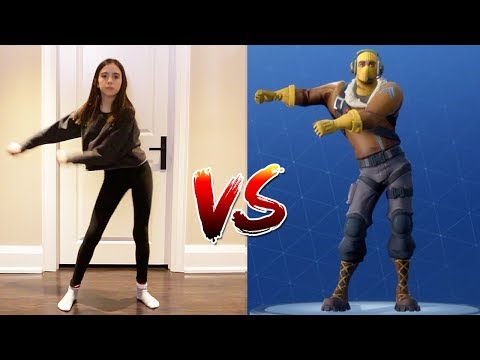

In [0]:
YOUTUBE_ID = 'RXABo9hm8B8'


YouTubeVideo(YOUTUBE_ID)

Download the above youtube video, cut the first 5 seconds and do the pose detection on that 5 seconds:

In [0]:
!cd openpose && ./build/examples/openpose/openpose.bin --image_dir ../images/ --display 0 --write_images ../images --write_images_format jpg

Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
OpenPose demo successfully finished. Total time: 2.095991 seconds.


In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


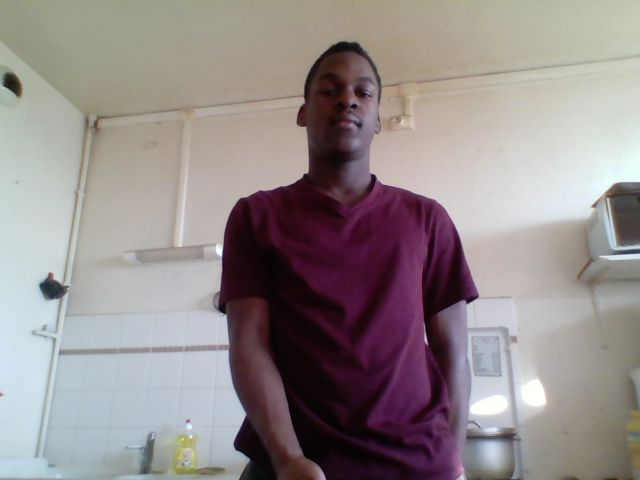

In [0]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

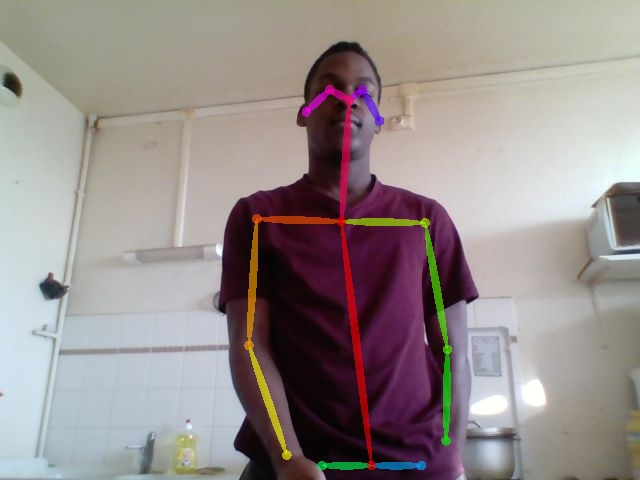

In [0]:
display(Image('images/photo_rendered_rendered.jpg'))

In [0]:
!ffmpeg -i openpose.avi output.mp4

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

In [0]:
!rm -rf youtube.mp4
# download the youtube with the given ID
!youtube-dl -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID
# cut the first 5 seconds
!ffmpeg -y -loglevel info -i youtube.mp4 -t 5 video.mp4
# detect poses on the these 5 seconds
!rm openpose.avi
!cd openpose && ./build/examples/openpose/openpose.bin --video ../video.mp4 --write_json ./output/ --display 0  --write_video ../openpose.avi
# convert the result into MP4
!ffmpeg -y -loglevel info -i openpose.avi output.mp4

[youtube] RXABo9hm8B8: Downloading webpage
[youtube] RXABo9hm8B8: Downloading video info webpage
[download] Destination: youtube.mp4
[download] 100% of 116.25MiB in 00:02
ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-lib

Finally, visualize the result:

In [0]:
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

show_local_mp4_video('output.mp4', width=960, height=720)